In [2]:
# R code for the assignment

# install necessary libraries
if(!requireNamespace("pacman",quietly = TRUE)){
  install.packages("pacman")
}
pacman :: p_load(ggplot2, corrplot,lmtest,qqplotr,coda,e1071,caret,MASS,dplyr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


corrplot installed

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘zoo’



lmtest installed

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘bitops’, ‘iterators’, ‘DEoptimR’, ‘caTools’, ‘pracma’, ‘twosamples’, ‘doParallel’, ‘pbmcapply’, ‘foreach’, ‘robustbase’, ‘opdisDownsampling’, ‘qqconf’


Warning message in utils::install.packages(package, ...):
“installation of package ‘qqconf’ had non-zero exit status”
Warning message in utils::install.packages(package, ...):
“installation of package ‘qqplotr’ had non-zero exit status”
Warning message in p_install(package, character.only = TRUE, ...):
“”
Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = 

In [3]:
install.packages("gridExtra")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [4]:
#set a consistent them for ggplot2
theme_set(theme_minimal())

#Task1 : Preliminary Data Analysis

In [5]:
#1 data import and exploration
# 1.1 Import data
data_dir <- "Datasets" #specify your dataset folder path
read_data <- function(filename,path = data_dir){
  read.csv(file.path(path,filename), header = FALSE)
}

In [6]:
X_df <- as.matrix(read.csv("x.csv"))
colnames(X_df) <- c("x1","x3","x4","x5") #assign column to x

Y <- as.matrix(read.csv("y.csv"))
colnames(Y) <- c("x2") # Rename column to output

time <- read.csv("time.csv")
colnames(time) <- c("Time")

In [7]:
# 1.2 combine X and Y into single data frame
data <- data.frame(X_df, x2 = Y[,1]) # Combine features (X_df) and target (Y[,1]) into a single data frame

In [8]:
#1.3 Summary and structure (Useful for Initial Inspection)
#dataset overview
cat(" Dataset Overview\n")
cat(" Number of Rows: ", nrow(data), "\n")
cat(" Number of Columns: ", ncol(data), "\n")

 Dataset Overview
 Number of Rows:  9567 
 Number of Columns:  5 


In [9]:
#Summary statistics
cat("Summary Statistics\n")
print(summary(data)) # it is used to print the structured output

Summary Statistics
       x1              x3              x4               x5        
 Min.   : 1.81   Min.   :25.36   Min.   : 992.9   Min.   : 25.56  
 1st Qu.:13.51   1st Qu.:41.74   1st Qu.:1009.1   1st Qu.: 63.33  
 Median :20.35   Median :52.08   Median :1012.9   Median : 74.97  
 Mean   :19.65   Mean   :54.31   Mean   :1013.3   Mean   : 73.31  
 3rd Qu.:25.72   3rd Qu.:66.54   3rd Qu.:1017.3   3rd Qu.: 84.83  
 Max.   :37.11   Max.   :81.56   Max.   :1033.3   Max.   :100.16  
       x2       
 Min.   :420.3  
 1st Qu.:439.8  
 Median :451.5  
 Mean   :454.4  
 3rd Qu.:468.4  
 Max.   :495.8  


In [10]:
#Missing Values
cat("Missing Values Per Column\n")
print(colSums(is.na(data)))

Missing Values Per Column
x1 x3 x4 x5 x2 
 0  0  0  0  0 


In [11]:
#See 1st 5 rows
cat("Preview(First 5 Rows)\n")
print(head(data,5))# to print the top 5 data from the dataset

Preview(First 5 Rows)
     x1    x3      x4    x5     x2
1 23.64 58.49 1011.40 74.20 445.75
2 29.74 56.90 1007.15 41.91 438.76
3 19.07 49.69 1007.22 76.79 453.09
4 11.80 40.66 1017.13 97.20 464.43
5 13.97 39.16 1016.05 84.60 470.96


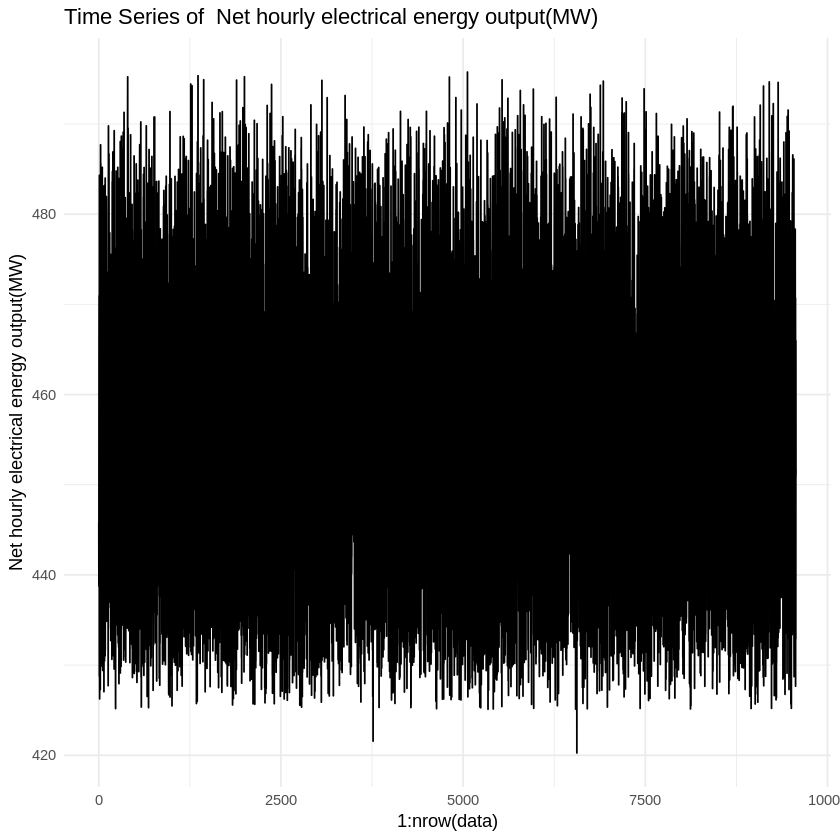

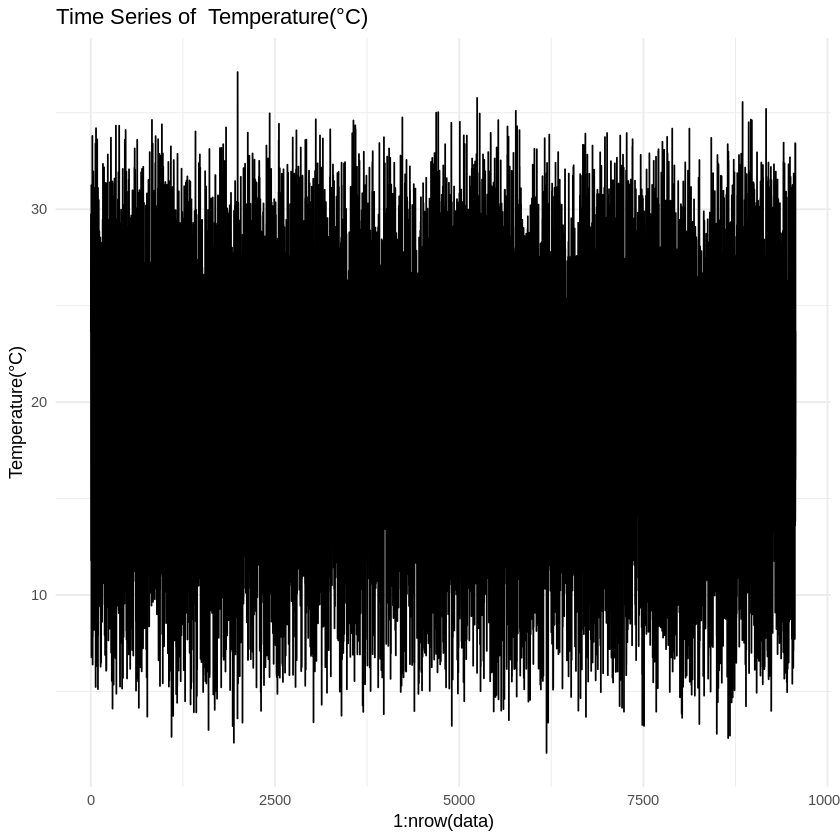

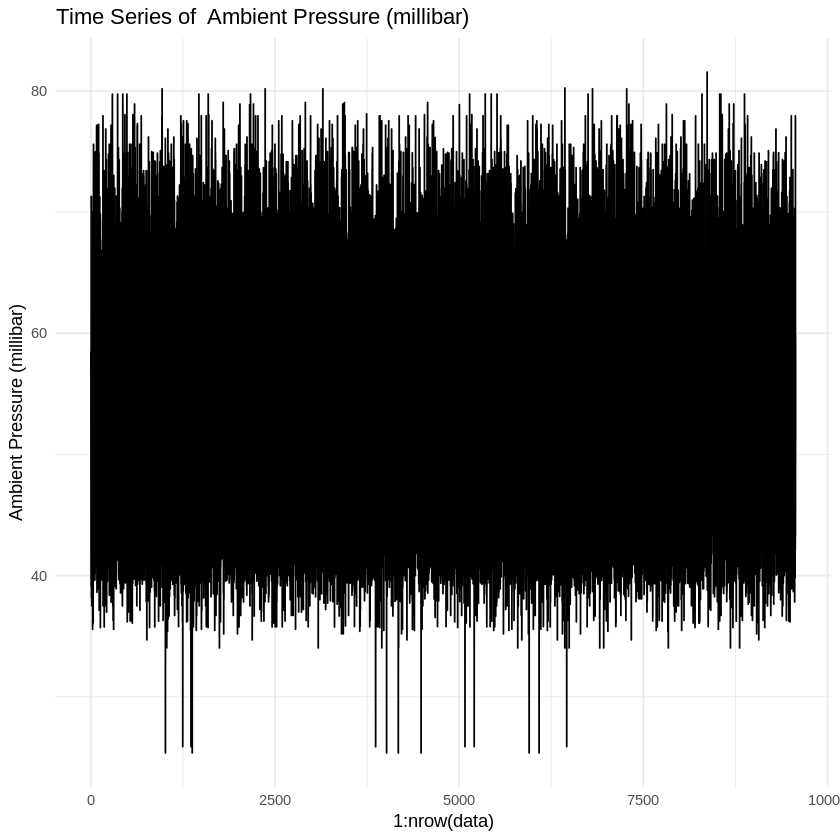

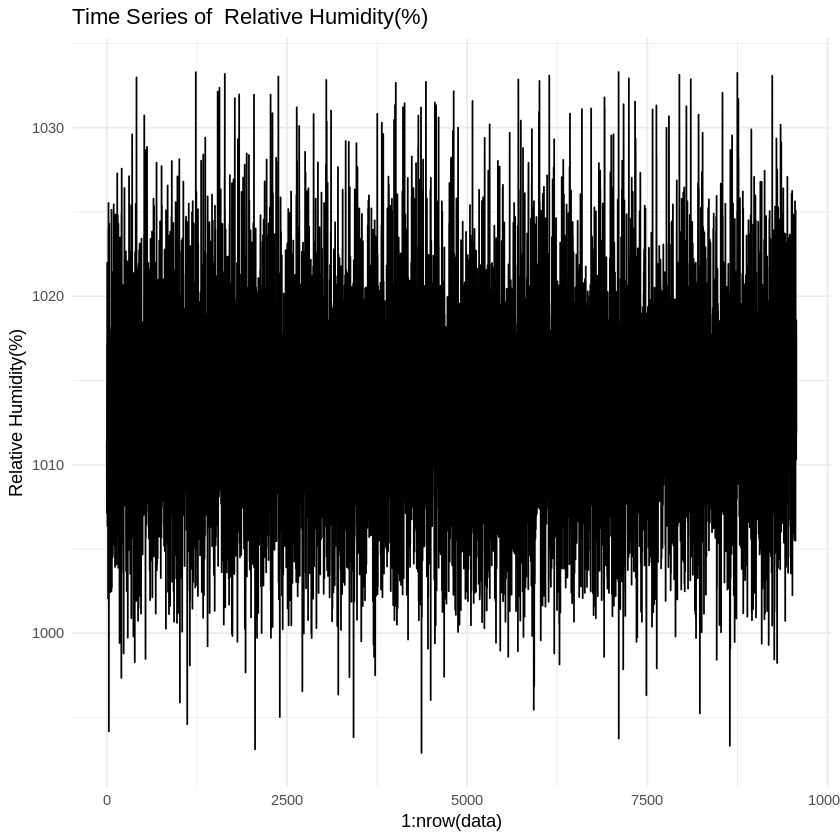

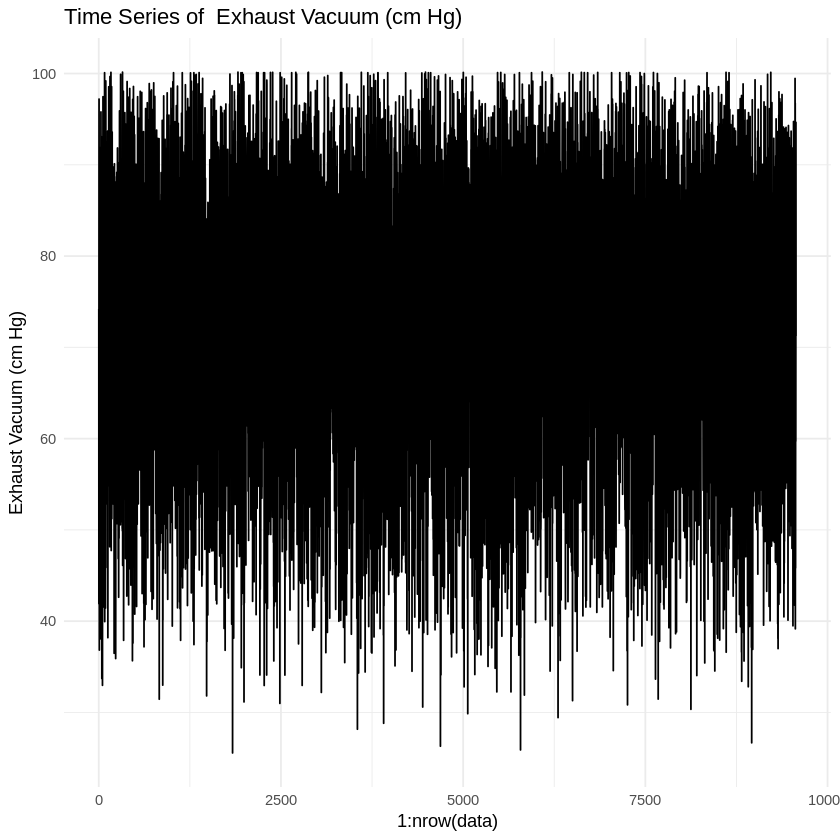

In [12]:
# 1.4 Time Series Plots
plot_time_series <- function(data,variable, var_name,xlab = "Index", ylab = var_name){
  ggplot(data, aes(x = 1:nrow(data), y= !!sym(variable))) + geom_line()+
    labs(title = paste("Time Series of ", var_name), X = xlab, y = ylab)
}

plot_time_series(data,"x2", "Net hourly electrical energy output(MW)")
plot_time_series(data, "x1","Temperature(°C)")
plot_time_series(data,"x3","Ambient Pressure (millibar)")
plot_time_series(data,"x4","Relative Humidity(%)")
plot_time_series(data,"x5", "Exhaust Vacuum (cm Hg)")

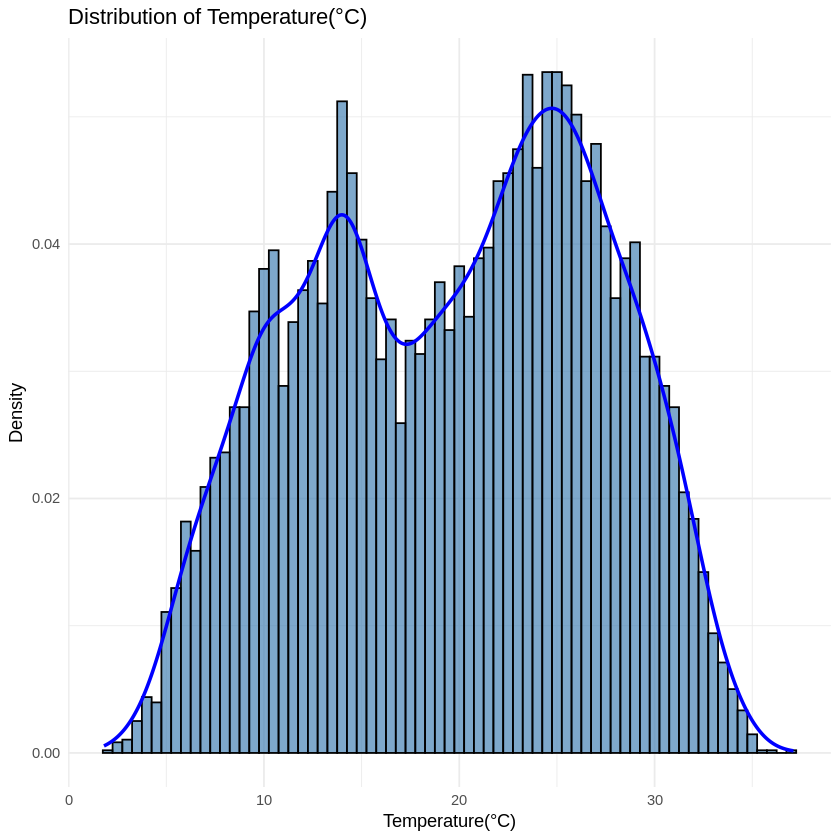

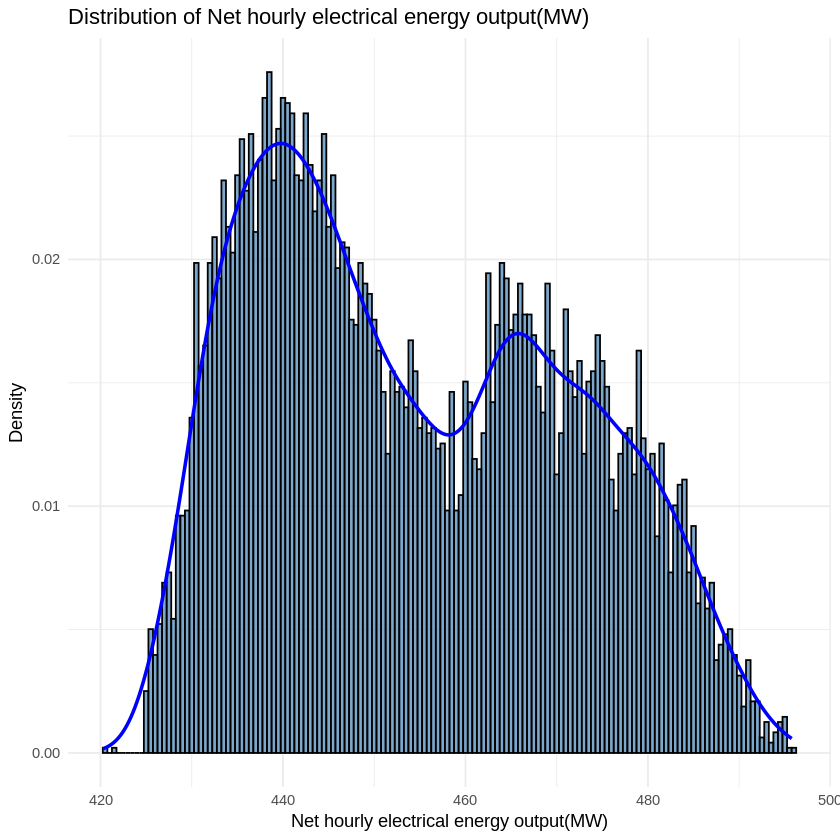

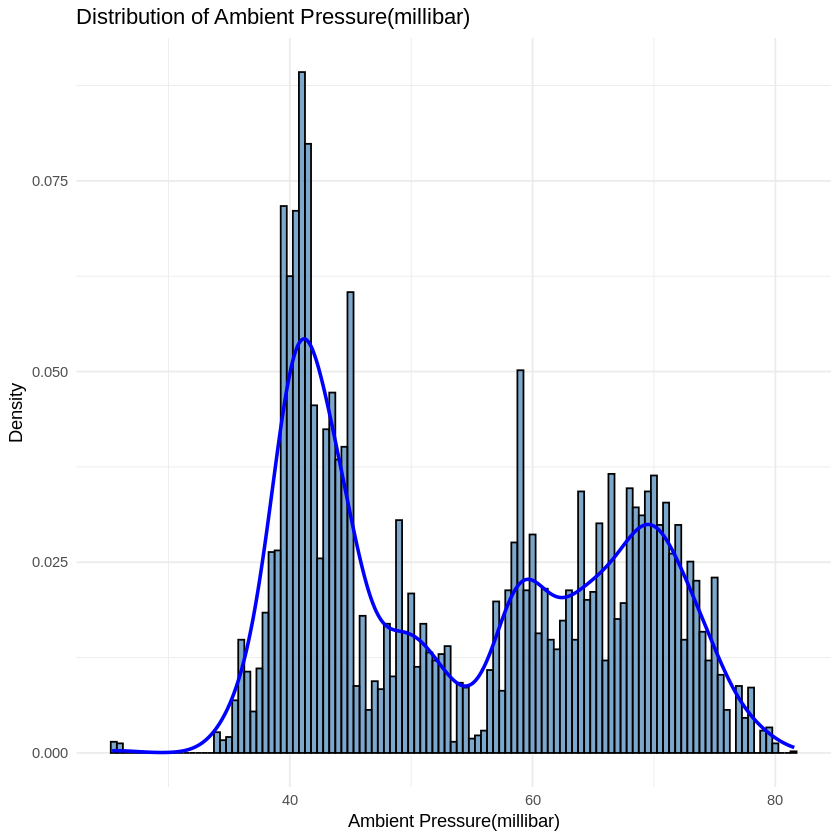

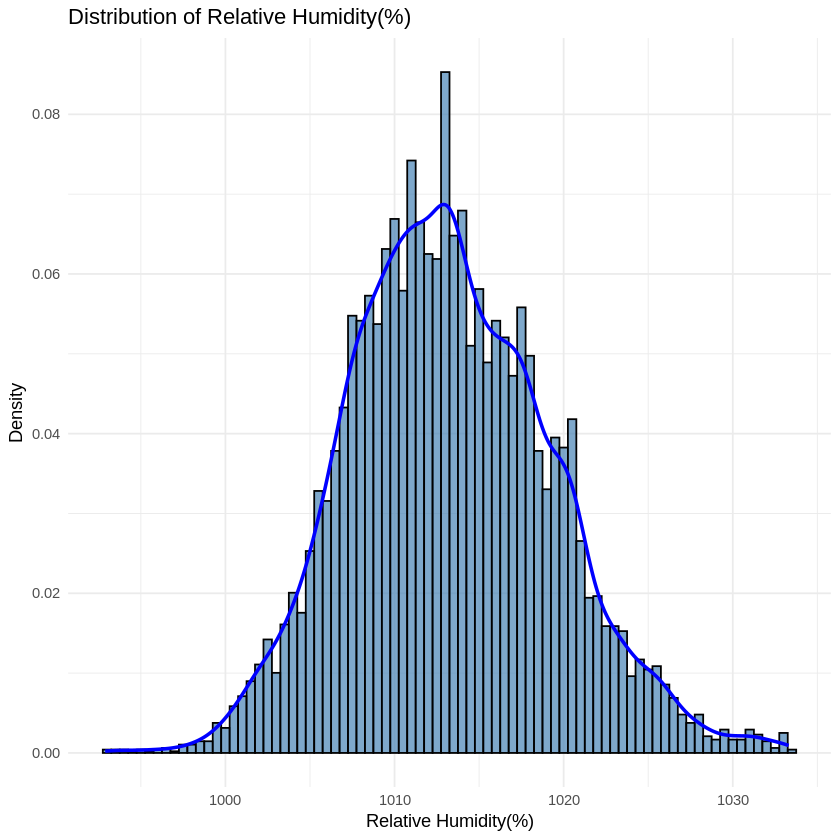

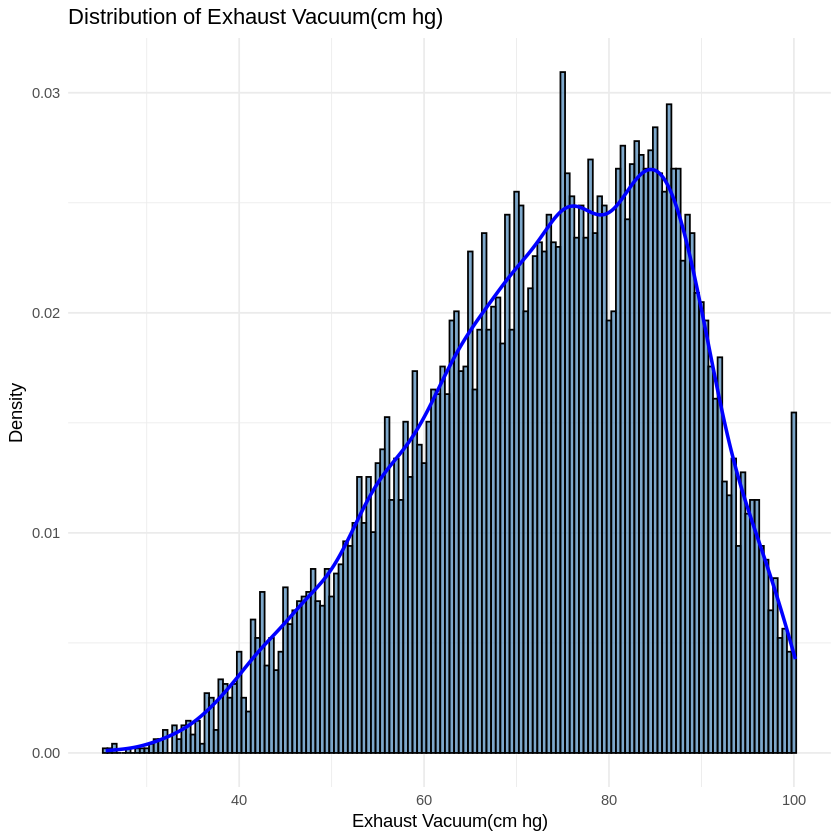

In [13]:
# 1.5 Distribution for Each Signal
plot_histogram_with_density <- function(data, variable, var_name, xlab = var_name, color = "steelblue", binwidth = NULL) {
  ggplot(data, aes(x = !!sym(variable))) +
    geom_histogram(aes(y = after_stat(density)), binwidth = binwidth, fill = color, color = "black", alpha = 0.7) +
    geom_density(color = "blue", lwd = 1) +
    labs(title = paste("Distribution of", var_name), x = xlab, y = "Density")
}

plot_histogram_with_density(data,"x1","Temperature(°C)",binwidth = 0.5)
plot_histogram_with_density(data,"x2","Net hourly electrical energy output(MW)",color = "steelblue",binwidth = 0.5)
plot_histogram_with_density(data,"x3","Ambient Pressure(millibar)",color = "steelblue",binwidth = 0.5)
plot_histogram_with_density(data,"x4","Relative Humidity(%)", color = "steelblue",binwidth = 0.5)
plot_histogram_with_density(data,"x5","Exhaust Vacuum(cm hg)", color = "steelblue",binwidth = 0.5)

[1] "Correlation Matrix:"
           x1         x3         x4         x5         x2
x1  1.0000000  0.8440894 -0.5076795 -0.5424556 -0.9481159
x3  0.8440894  1.0000000 -0.4135756 -0.3120998 -0.8697680
x4 -0.5076795 -0.4135756  1.0000000  0.0996307  0.5185621
x5 -0.5424556 -0.3120998  0.0996307  1.0000000  0.3896855
x2 -0.9481159 -0.8697680  0.5185621  0.3896855  1.0000000


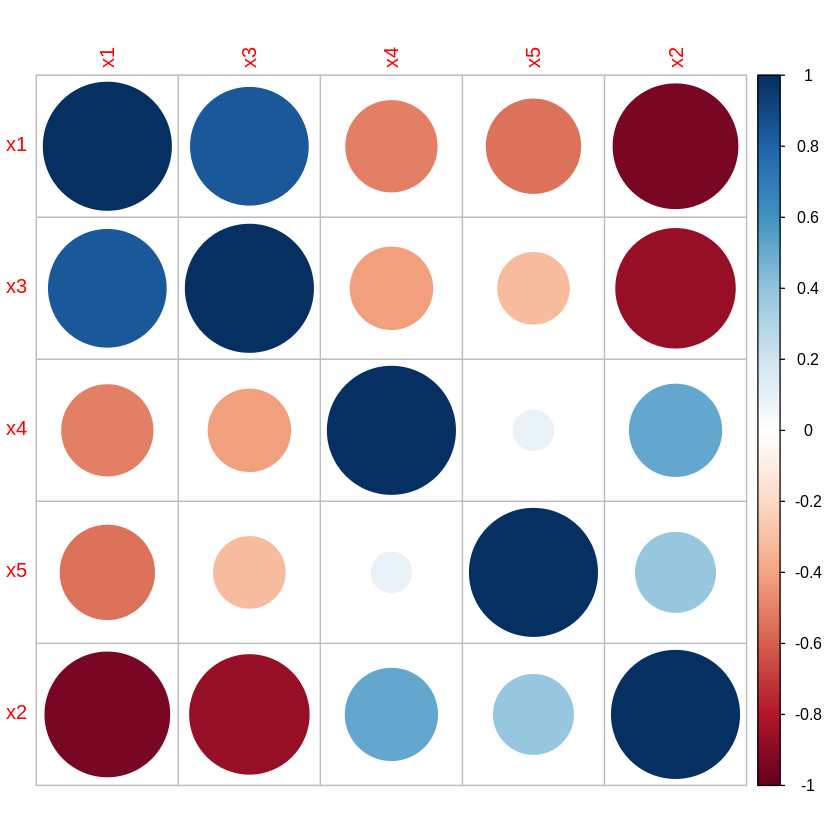

In [14]:
# 1.6. Correlation and scatter plots
# Correlation matrix
corr_matrix <- cor(data)
print("Correlation Matrix:")
print(corr_matrix)

corrplot(corr_matrix, method = "circle")

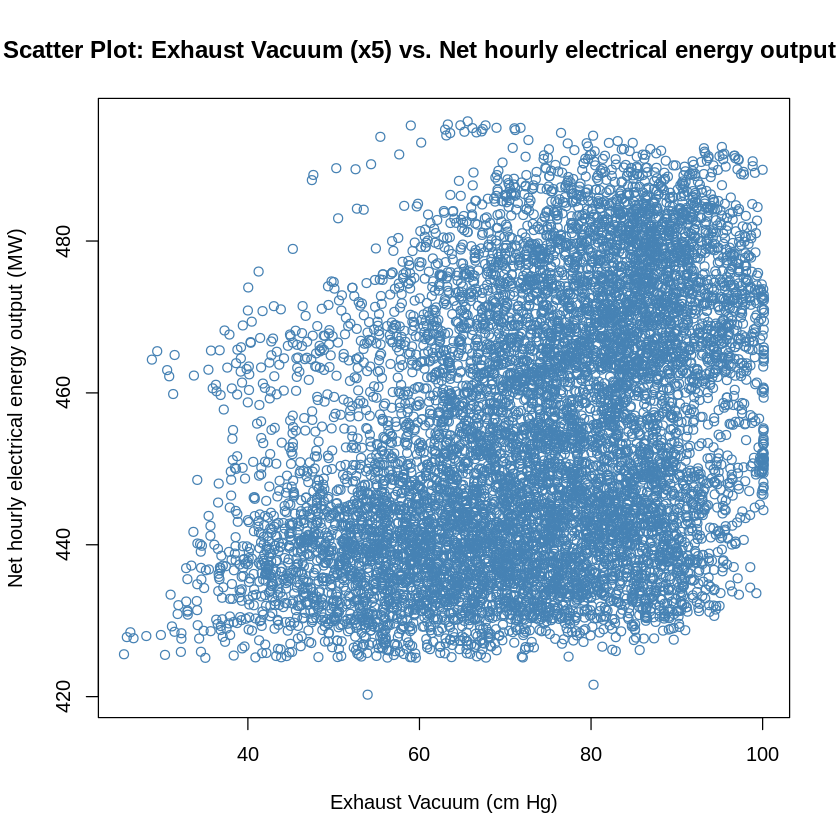

In [15]:
# Scatter Plot: Exhaust Vacuum (x5) vs. Net hourly electrical energy output (x2)
plot(data$x5, data$x2,
  main = "Scatter Plot: Exhaust Vacuum (x5) vs. Net hourly electrical energy output (x2)",
  xlab = "Exhaust Vacuum (cm Hg)",
  ylab = "Net hourly electrical energy output (MW)",
  col = "steelblue"
)

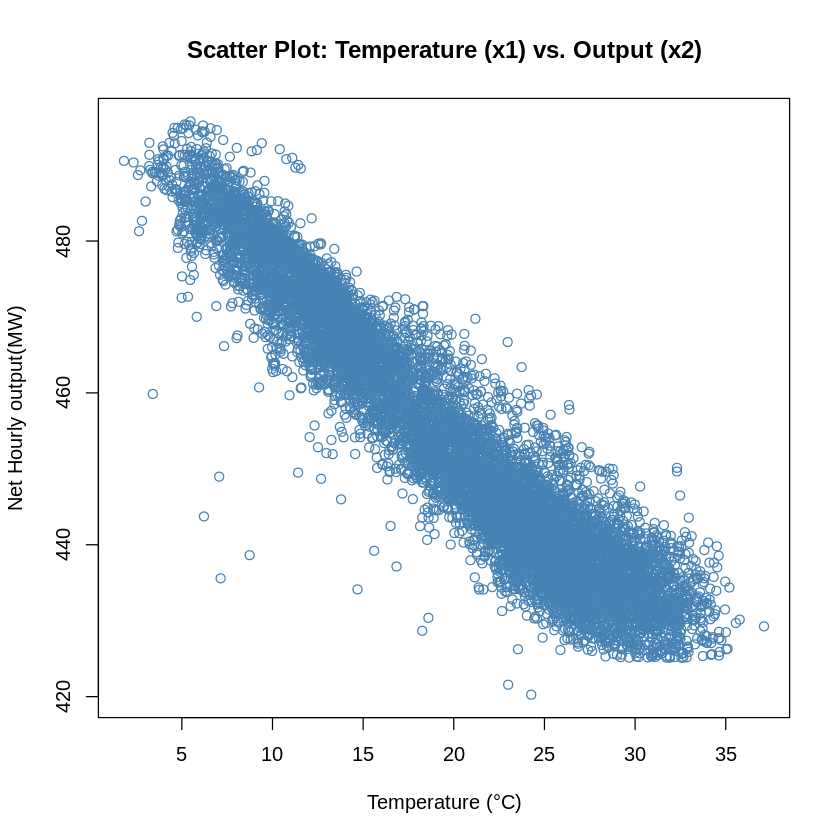

In [16]:
# Scatter Plot: Temperature (x1) vs. Output (x2)
plot(data$x1, data$x2,
  main = "Scatter Plot: Temperature (x1) vs. Output (x2)",
  ylab = "Net Hourly output(MW)",
  xlab = "Temperature (°C)",
  col = "steelblue"
)

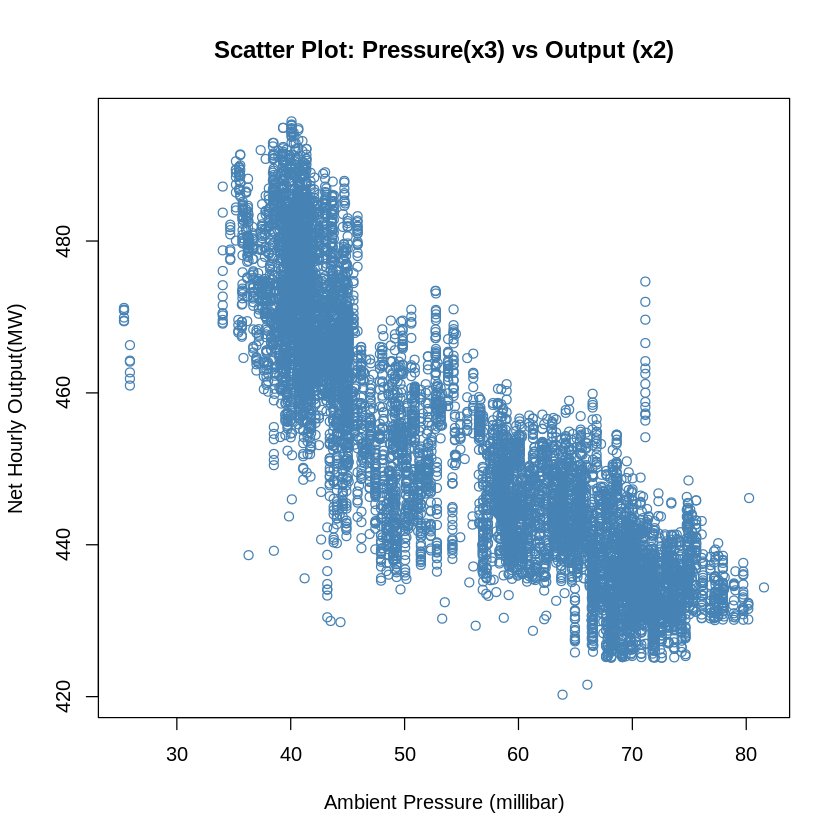

In [17]:
# Scatter Plot: Pressure(x3) vs Output (x2)
plot(data$x3, data$x2,
  main = "Scatter Plot: Pressure(x3) vs Output (x2)",
  xlab = "Ambient Pressure (millibar)",
  ylab = "Net Hourly Output(MW)",
  col = "steelblue"
)

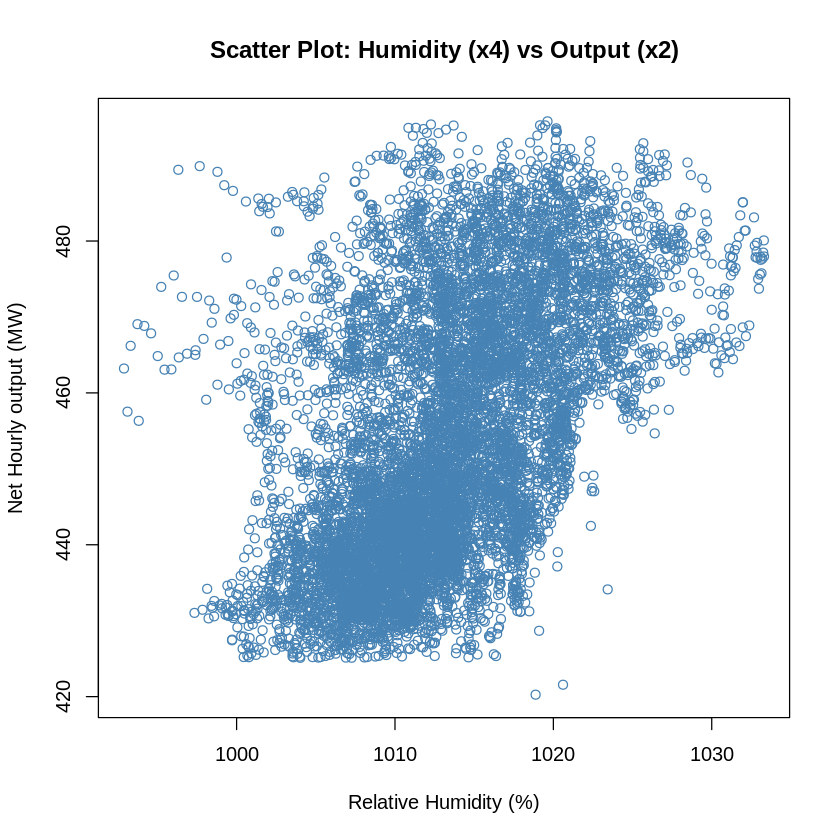

In [18]:
# Scatter Plot: Humidity (x4) vs Output (x2)
plot(data$x4, data$x2,
  main = "Scatter Plot: Humidity (x4) vs Output (x2)",
  xlab = "Relative Humidity (%)",
  ylab = "Net Hourly output (MW)",
  col = "steelblue"
)

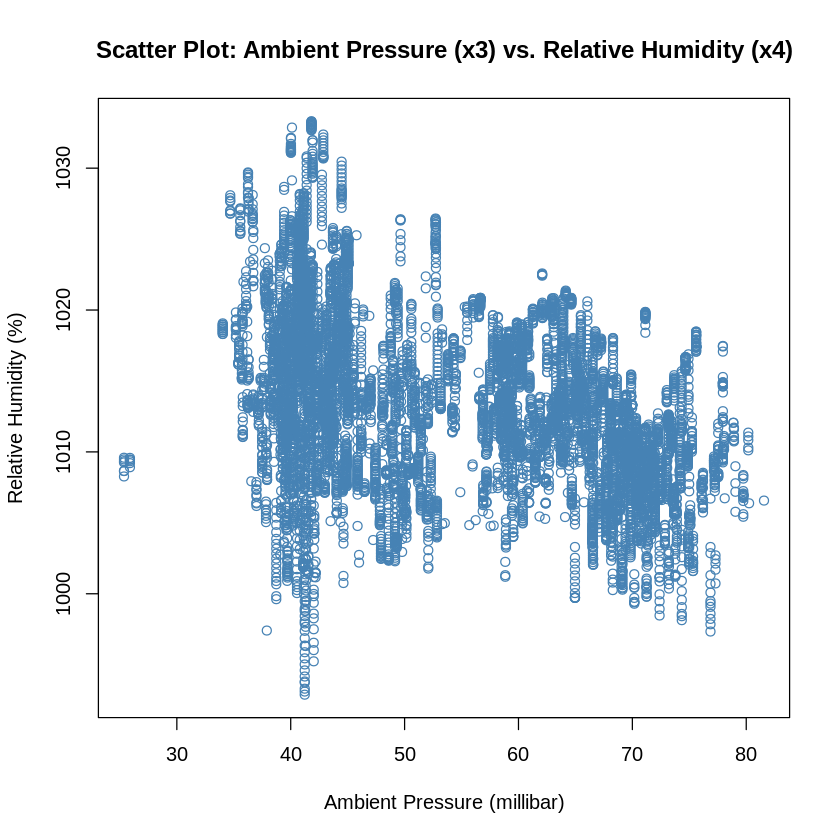

In [19]:
# Scatter Plot: Ambient Pressure (x3) vs. Relative Humidity (x4)
plot(data$x3, data$x4,
  main = "Scatter Plot: Ambient Pressure (x3) vs. Relative Humidity (x4)",
  xlab = "Ambient Pressure (millibar)",
  ylab = "Relative Humidity (%)",
  col = "steelblue"
)

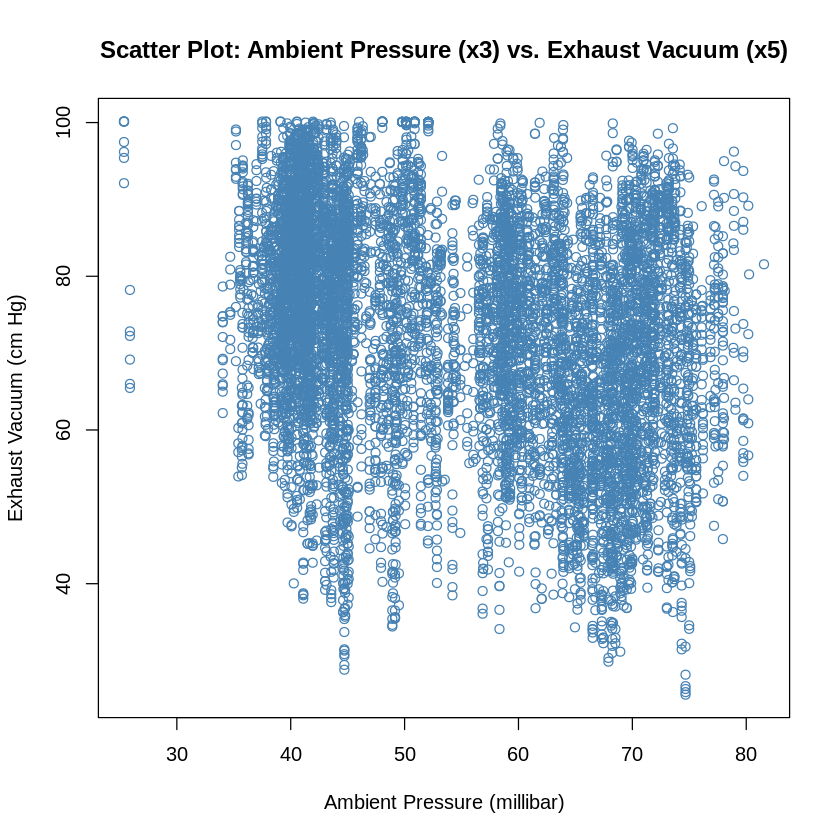

In [20]:
# Scatter Plot: Ambient Pressure (x3) vs. Exhaust Vacuum (x5)
plot(data$x3, data$x5,
  main = "Scatter Plot: Ambient Pressure (x3) vs. Exhaust Vacuum (x5)",
  xlab = "Ambient Pressure (millibar)",
  ylab = "Exhaust Vacuum (cm Hg)",
  col = "steelblue"
)

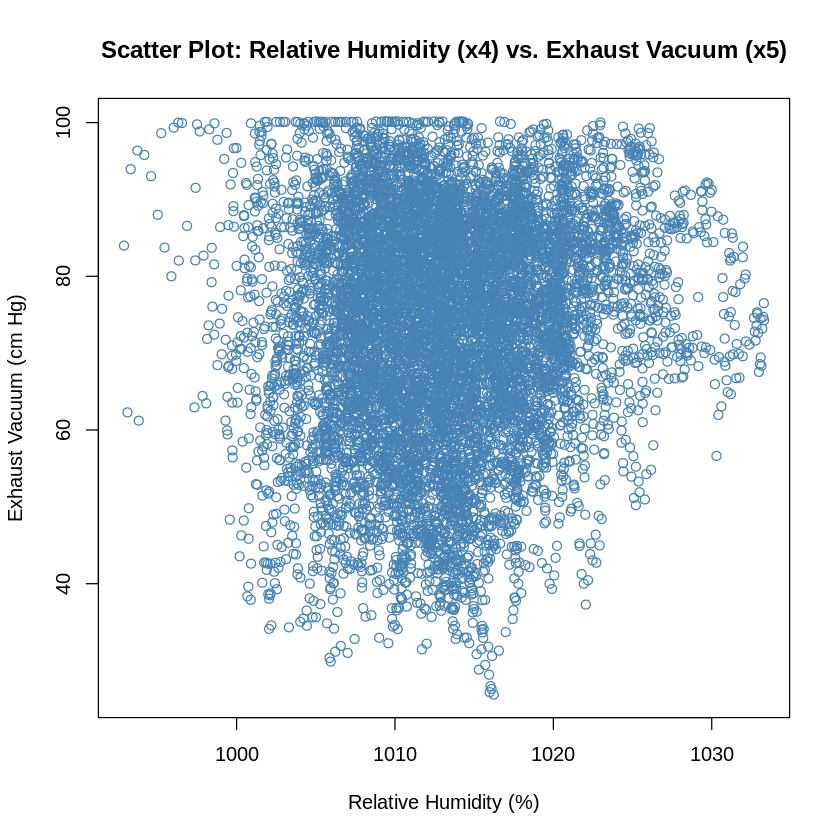

In [21]:
# Scatter Plot: Relative Humidity (x4) vs. Exhaust Vacuum (x5)
plot(data$x4, data$x5,
  main = "Scatter Plot: Relative Humidity (x4) vs. Exhaust Vacuum (x5)",
  xlab = "Relative Humidity (%)",
  ylab = "Exhaust Vacuum (cm Hg)",
  col = "steelblue"
)

# Task2 : Regression- Modelling the Relationship

In [65]:
X_df <- as.matrix(read.csv("x.csv", header = FALSE)) # Import X dataset and convert it into a matrix format
colnames(X_df) <- c("x1", "x3", "x4", "x5") # Set column names to represent environmental input variables

# Import the target variable data
Y_matrix <- as.matrix(read.csv("y.csv", header = FALSE)) # Load Y dataset and transform it into a matrix
colnames(Y_matrix) <- c("x2") # Label the column as x2, indicating the energy output variable

# Import the time-related data
time_df <- read.csv("time.csv", header = FALSE) # Load the dataset containing time information
colnames(time_df) <- c("Time") # Name the column as 'Time'

# Merge features and target into one data frame for streamlined analysis
data_df <- data.frame(X_df, x2 = Y_matrix[, 1]) # Combine input variables and output into a single data frame


In [66]:
# --- Task 2: Regression – Exploring Predictive Models ---

# The regression models under consideration are:
#   Model 1: y = θ₁·x₄ + θ₂·x₃² + θ_bias
#   Model 2: y = θ₁·x₄ + θ₂·x₃² + θ₃·x₅ + θ_bias
#   Model 3: y = θ₁·x₃ + θ₂·x₄ + θ₃·x₅³ + θ_bias
#   Model 4: y = θ₁·x₄ + θ₂·x₃² + θ₃·x₅³ + θ_bias
#   Model 5: y = θ₁·x₄ + θ₂·x₁² + θ₃·x₃² + θ_bias

# Extract the target variable (dependent variable)
y_response <- data_df$x2 # Use the net hourly energy output as the response vector

# Construct a list of predictor data frames, one for each model
# Each entry contains the relevant features (transformed or raw) used in that specific model
model_definitions <- list(
  model1 = data.frame(x4 = data_df$x4, x3_sq = data_df$x3^2), # Features used in Model 1
  model2 = data.frame(x4 = data_df$x4, x3_sq = data_df$x3^2, x5 = data_df$x5), # Features used in Model 2
  model3 = data.frame(x3 = data_df$x3, x4 = data_df$x4, x5_cubed = data_df$x5^3), # Features used in Model 3
  model4 = data.frame(x4 = data_df$x4, x3_sq = data_df$x3^2, x5_cubed = data_df$x5^3), # Features used in Model 4
  model5 = data.frame(x4 = data_df$x4, x1_sq = data_df$x1^2, x3_sq = data_df$x3^2) # Features used in Model 5
)


In [67]:
# --- 2.1 Estimate Model Parameters (θ) ---

# Ordinary Least Squares (OLS) will be used with scaled predictors.
# The estimation follows: θ_hat = (XᵀX)⁻¹ Xᵀy. Regularization is disabled by setting lambda to 0.

lambda_ols_param <- 0 # Use no regularization (lambda = 0) for OLS estimation

# Function to compute theta using OLS with standardized predictors
estimate_theta_ols_scaled <- function(X_scaled_no_intercept, y_response_vec, lambda_val) {
  # Check for intercept-only scenario (no predictor columns but valid rows)
  if (ncol(X_scaled_no_intercept) == 0 && nrow(X_scaled_no_intercept) > 0) {
    X_final_mat <- matrix(1, nrow = nrow(X_scaled_no_intercept), ncol = 1) # Only an intercept column
    colnames(X_final_mat) <- c("(Intercept)")
  } else if (nrow(X_scaled_no_intercept) > 0) { # Predictors available
    X_final_mat <- cbind("(Intercept)" = rep(1, nrow(X_scaled_no_intercept)), X_scaled_no_intercept) # Add intercept to predictors
  } else { # No rows of data
     warning("Input X_scaled_no_intercept has 0 rows.")
     return(NA) # Return NA when no data is available
  }

  # Check if the number of observations is sufficient for parameter estimation
  if (nrow(X_final_mat) < ncol(X_final_mat)) {
    warning(paste0("Skipping OLS - not enough rows (", nrow(X_final_mat),
                  ") for predictors (", ncol(X_final_mat), ")."))
    return(NA) # Return NA if there are more parameters than observations
  }

  # Estimate theta_hat using the OLS equation, optionally with regularization
  theta_hat <- tryCatch({
    XtX <- t(X_final_mat) %*% X_final_mat # Compute XᵀX
    penalty_matrix <- lambda_val * diag(ncol(X_final_mat)) # Add penalty matrix (used in Ridge, ignored if lambda = 0)
    if (ncol(X_final_mat) > 0) penalty_matrix[1,1] <- 0 # Avoid penalizing the intercept
    XtX_reg <- XtX + penalty_matrix # Regularized XᵀX matrix

    # Use generalized inverse for numerical stability
    estimated_coeffs <- MASS::ginv(XtX_reg) %*% t(X_final_mat) %*% y_response_vec
    rownames(estimated_coeffs) <- colnames(X_final_mat) # Label the coefficients
    return(estimated_coeffs)
  }, error = function(e) {
    message(paste0("Error calculating theta_hat with OLS: ", e$message))
    return(NA) # Return NA if an error occurs
  })
  return(theta_hat)
}

# Initialize containers to save results across all models
theta_list_all_models <- list() # Stores theta estimates for each model
X_final_processed_list_all_models <- list() # Stores the finalized design matrices with intercepts

# Iterate through each candidate model
for (model_label in names(model_definitions)) {
  cat("\nProcessing model:", model_label, "\n")
  X_raw_current_df <- model_definitions[[model_label]] # Get the predictors for the current model

  # Skip models with no data
  if (is.null(X_raw_current_df) || nrow(X_raw_current_df) == 0) {
    theta_list_all_models[[model_label]] <- NA
    X_final_processed_list_all_models[[model_label]] <- NA
    next
  }

  X_raw_current_mat <- as.matrix(X_raw_current_df) # Convert predictors to matrix format
  X_scaled_current_no_int <- matrix(nrow = nrow(X_raw_current_mat), ncol = 0) # Prepare matrix to hold scaled predictors

  # Apply scaling if predictors exist
  if (ncol(X_raw_current_mat) > 0) {
    original_colnames <- colnames(X_raw_current_mat) # Save original names
    # Provide default names if column names are missing
    if (is.null(original_colnames)) {
        original_colnames <- if(ncol(X_raw_current_mat) == 1 && !is.null(names(X_raw_current_df))) names(X_raw_current_df) else paste0("V", 1:ncol(X_raw_current_mat))
    }
    X_scaled_temp_mat <- scale(X_raw_current_mat) # Center and scale the data
    X_scaled_temp_mat[is.na(X_scaled_temp_mat)] <- 0 # Replace missing values caused by scaling with 0
    X_scaled_current_no_int <- X_scaled_temp_mat
    colnames(X_scaled_current_no_int) <- original_colnames # Reapply original column names
  }

  # Estimate parameters using OLS for the current model
  current_theta_hat_val <- estimate_theta_ols_scaled(X_scaled_current_no_int, y_response, lambda_val = lambda_ols_param)
  theta_list_all_models[[model_label]] <- current_theta_hat_val # Save estimated coefficients

  # Save the final design matrix used for estimation
  if (!is.null(current_theta_hat_val) && !all(is.na(current_theta_hat_val))) {
      X_final_processed_list_all_models[[model_label]] <- if (ncol(X_scaled_current_no_int) == 0 && nrow(X_scaled_current_no_int) > 0) {
          # Only intercept column
          matrix(1, nrow = nrow(X_scaled_current_no_int), ncol = 1, dimnames = list(NULL, "(Intercept)"))
      } else if (nrow(X_scaled_current_no_int) > 0) {
          # Intercept plus scaled predictors
          cbind("(Intercept)" = rep(1, nrow(X_scaled_current_no_int)), X_scaled_current_no_int)
      } else { NA }
  } else {
      X_final_processed_list_all_models[[model_label]] <- NA # Save NA if estimation failed
  }
  cat("Theta_hat for", model_label, "(OLS on scaled predictors):\n"); print(current_theta_hat_val)
}



Processing model: model1 
Theta_hat for model1 (OLS on scaled predictors):
                  [,1]
(Intercept) 454.365009
x4            3.348278
x3_sq       -13.211452

Processing model: model2 
Theta_hat for model2 (OLS on scaled predictors):
                  [,1]
(Intercept) 454.365009
x4            3.432657
x3_sq       -12.406622
x5            2.517326

Processing model: model3 
Theta_hat for model3 (OLS on scaled predictors):
                  [,1]
(Intercept) 454.365009
x3          -12.722943
x4            3.402683
x5_cubed      2.315840

Processing model: model4 
Theta_hat for model4 (OLS on scaled predictors):
                  [,1]
(Intercept) 454.365009
x4            3.487220
x3_sq       -12.402038
x5_cubed      2.487015

Processing model: model5 
Theta_hat for model5 (OLS on scaled predictors):
                  [,1]
(Intercept) 454.365009
x4            1.349107
x1_sq       -10.605331
x3_sq        -5.173124


In [68]:
# --- 2.2 Compute Residual Sum of Squared Errors (RSS) ---
# RSS is calculated as the sum of squared differences between actual and predicted values:
# RSS = Σ(yᵢ - xᵢᵀθ̂)² for i = 1 to n

# Define a function to compute RSS
compute_rss_func <- function(y_true, y_pred) {
  if (length(y_true) != length(y_pred)) stop("Length of y_true and y_pred must be the same.")
  sum((y_true - y_pred)^2, na.rm = TRUE) # Compute sum of squared residuals, ignoring NAs
}

# Compute RSS for each model
rss_list_all_models <- lapply(names(model_definitions), function(model_name) {
  current_theta <- theta_list_all_models[[model_name]]         # Retrieve estimated parameters
  X_processed_mat <- X_final_processed_list_all_models[[model_name]] # Retrieve the design matrix with intercept

  # If parameters or matrix are missing/invalid, return NA
  if (any(is.na(current_theta)) || any(is.na(X_processed_mat))) return(NA)
  if (ncol(X_processed_mat) != length(current_theta)) return(NA)

  # Generate predictions using the model: ŷ = Xθ̂
  y_pred_vals <- tryCatch(X_processed_mat %*% current_theta, error = function(e) NULL)
  if (is.null(y_pred_vals)) return(NA) # Return NA if prediction fails

  # Calculate RSS from the predictions
  rss_val <- compute_rss_func(y_response, y_pred_vals)
  return(rss_val)
})
names(rss_list_all_models) <- names(model_definitions) # Label RSS results by model name

cat("\n--- Calculated RSS for all models ---\n")
print(data.frame(Model = names(rss_list_all_models), RSS = unlist(rss_list_all_models))) # Display RSS for each model



--- Calculated RSS for all models ---
        Model      RSS
model1 model1 657248.2
model2 model2 602347.1
model3 model3 547491.6
model4 model4 603630.7
model5 model5 365625.0


In [69]:
# --- 2.3 Compute Log-Likelihood and Variance ---
# Log-likelihood formula: ln p(D|θ̂) = -n/2 ln(2π) - n/2 ln(σ̂²) - (1/(2σ̂²)) * RSS
# Estimated variance: σ̂² = RSS / (n - 1)

# Define a function to compute both log-likelihood and variance
compute_loglik_var_func <- function(rss_val, n_obs, k_params) {
  # Calculate error variance (σ̂²) as RSS divided by (n - 1), per assignment instructions
  # Note: An alternative estimate uses (n - k_params) in the denominator
  sigma_sq_est <- rss_val / (n_obs - 1)

  # If variance estimate is non-positive (e.g., due to very low RSS or small n), log-likelihood is undefined
  if(sigma_sq_est <= 0) return(list(log_likelihood = -Inf, variance = sigma_sq_est))

  # Compute the log-likelihood based on the estimated variance
  log_lik_val <- -(n_obs / 2) * log(2 * pi) - (n_obs / 2) * log(sigma_sq_est) - (1 / (2 * sigma_sq_est)) * rss_val
  list(log_likelihood = log_lik_val, variance = sigma_sq_est)
}

# Calculate log-likelihood and variance for each regression model
loglik_var_list_all_models <- lapply(names(rss_list_all_models), function(model_name) {
  rss_val <- rss_list_all_models[[model_name]] # Retrieve RSS for the current model
  # Count the number of estimated parameters (k), including the intercept
  k_params_val <- length(theta_list_all_models[[model_name]][!is.na(theta_list_all_models[[model_name]])])

  if (is.na(rss_val)) return(list(log_likelihood = NA, variance = NA)) # Return NA if RSS is not available

  results <- compute_loglik_var_func(rss_val, length(y_response), k_params_val) # Compute metrics
  return(results)
})
names(loglik_var_list_all_models) <- names(model_definitions) # Label results by model

cat("\n--- Log-Likelihood and Variance for all models ---\n")
print(data.frame(Model = names(loglik_var_list_all_models),
                 LogLikelihood = sapply(loglik_var_list_all_models, `[[`, "log_likelihood"),
                 Variance = sapply(loglik_var_list_all_models, `[[`, "variance"))) # Display output



--- Log-Likelihood and Variance for all models ---
        Model LogLikelihood Variance
model1 model1     -33810.99 68.69951
model2 model2     -33393.69 62.96091
model3 model3     -32936.88 57.22710
model4 model4     -33403.88 63.09509
model5 model5     -31005.40 38.21731


In [70]:
# --- 2.4 Compute AIC and BIC ---
# AIC (Akaike Information Criterion): AIC = 2k - 2 * log-likelihood
# BIC (Bayesian Information Criterion): BIC = k * ln(n) - 2 * log-likelihood
# where k is the number of model parameters (including the intercept)

# Define a function to compute AIC from log-likelihood and number of parameters
compute_aic_val_func <- function(log_likelihood, k_params) 2 * k_params - 2 * log_likelihood

# Define a function to compute BIC using log-likelihood, number of parameters, and number of observations
compute_bic_val_func <- function(log_likelihood, k_params, n_obs) k_params * log(n_obs) - 2 * log_likelihood

# Loop over all models to calculate AIC and BIC
aic_bic_list_all_models <- lapply(names(model_definitions), function(model_name) {
  log_lik_val <- loglik_var_list_all_models[[model_name]]$log_likelihood # Get the log-likelihood for the model
  theta_vec <- theta_list_all_models[[model_name]] # Get the estimated coefficients
  # Count the number of estimated parameters (excluding any NAs), including the intercept
  k_params_val <- length(theta_vec[!is.na(theta_vec)])

  # If the log-likelihood is not available, return NA for both AIC and BIC
  if (is.na(log_lik_val)) return(list(AIC = NA, BIC = NA))

  # Compute AIC and BIC for the model
  aic_val <- compute_aic_val_func(log_lik_val, k_params_val)
  bic_val <- compute_bic_val_func(log_lik_val, k_params_val, length(y_response))
  return(list(AIC = aic_val, BIC = bic_val))
})
names(aic_bic_list_all_models) <- names(model_definitions) # Label each result with its model name

cat("\n--- AIC and BIC for all models ---\n")
print(data.frame(Model = names(aic_bic_list_all_models),
                 AIC = sapply(aic_bic_list_all_models, `[[`, "AIC"),
                 BIC = sapply(aic_bic_list_all_models, `[[`, "BIC"))) # Output the AIC and BIC values



--- AIC and BIC for all models ---
        Model      AIC      BIC
model1 model1 67627.98 67649.48
model2 model2 66795.38 66824.05
model3 model3 65881.77 65910.43
model4 model4 66815.75 66844.42
model5 model5 62018.79 62047.46


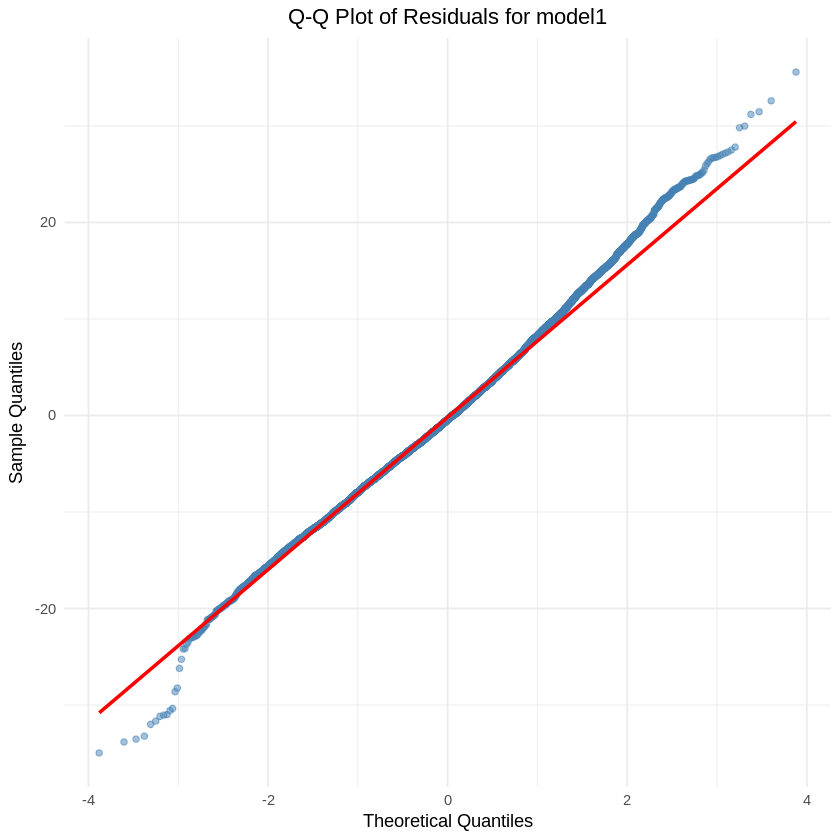

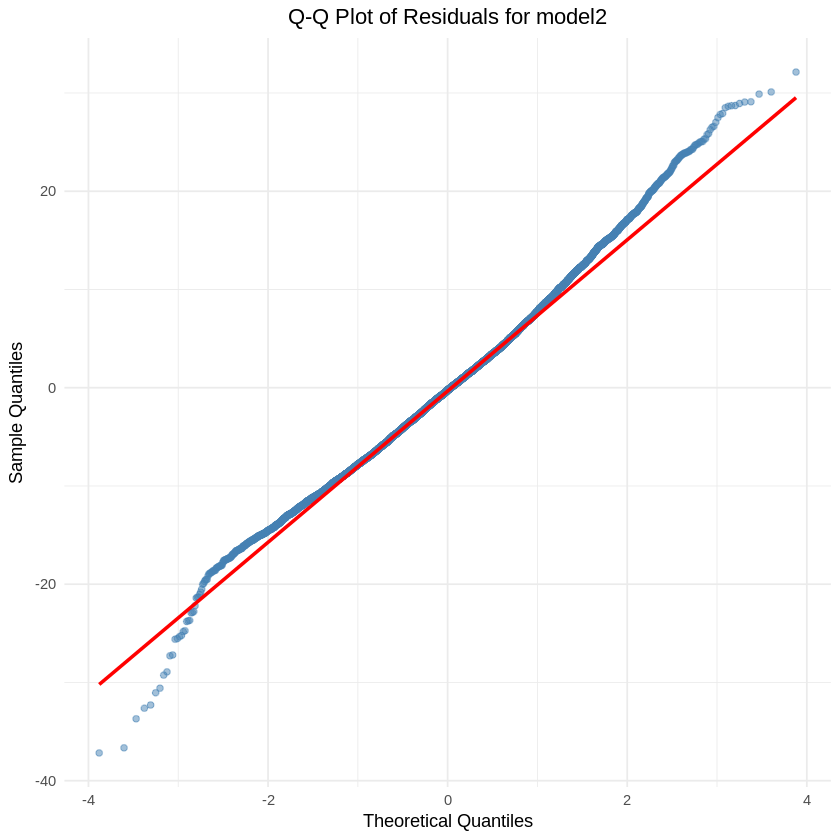

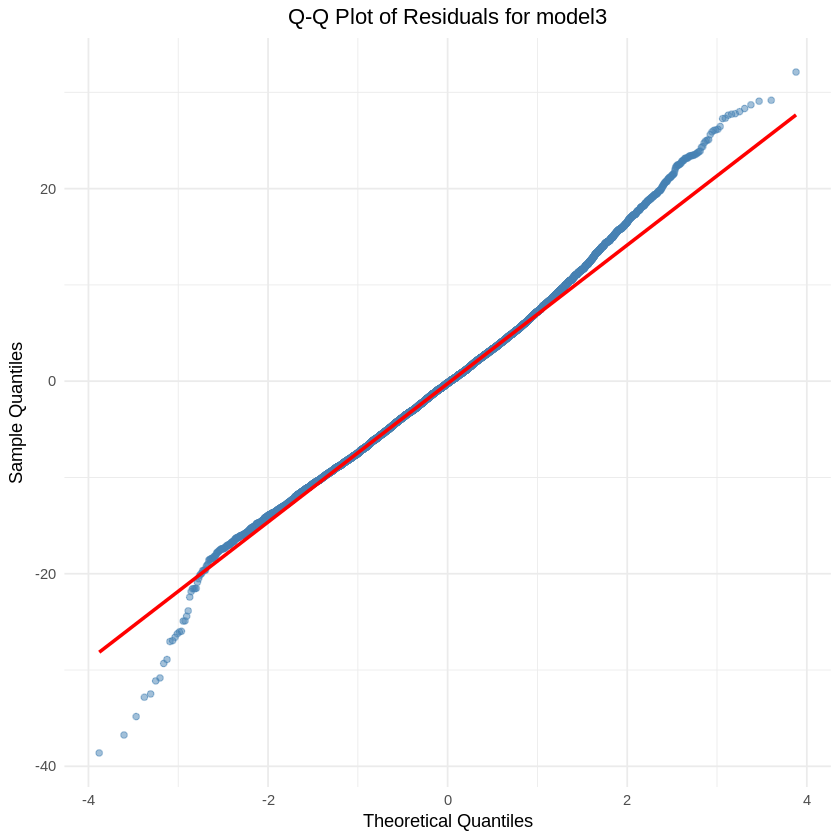

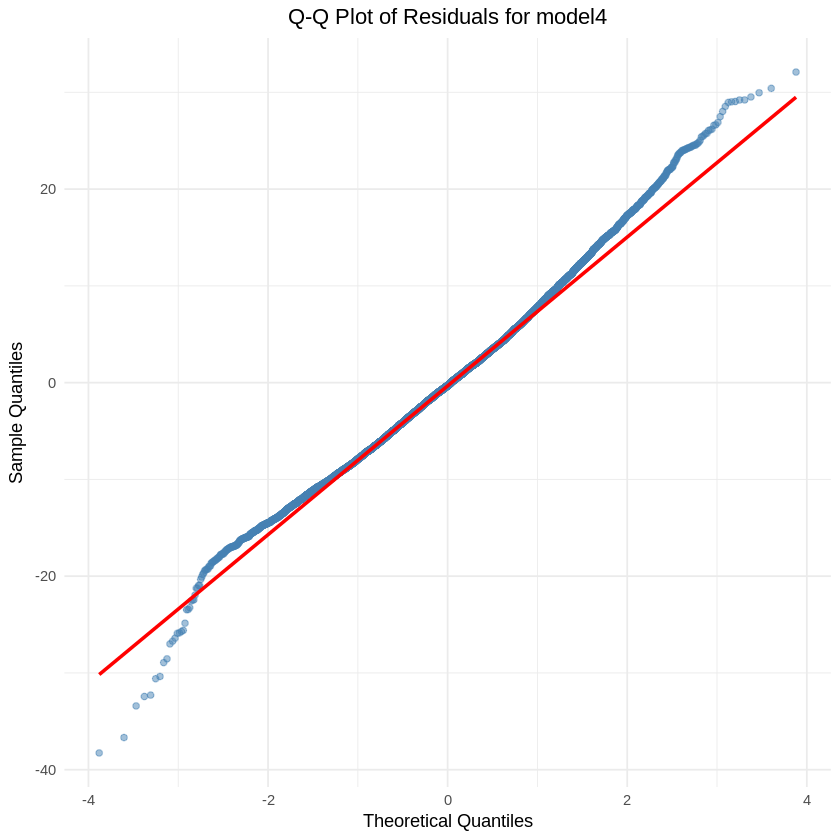

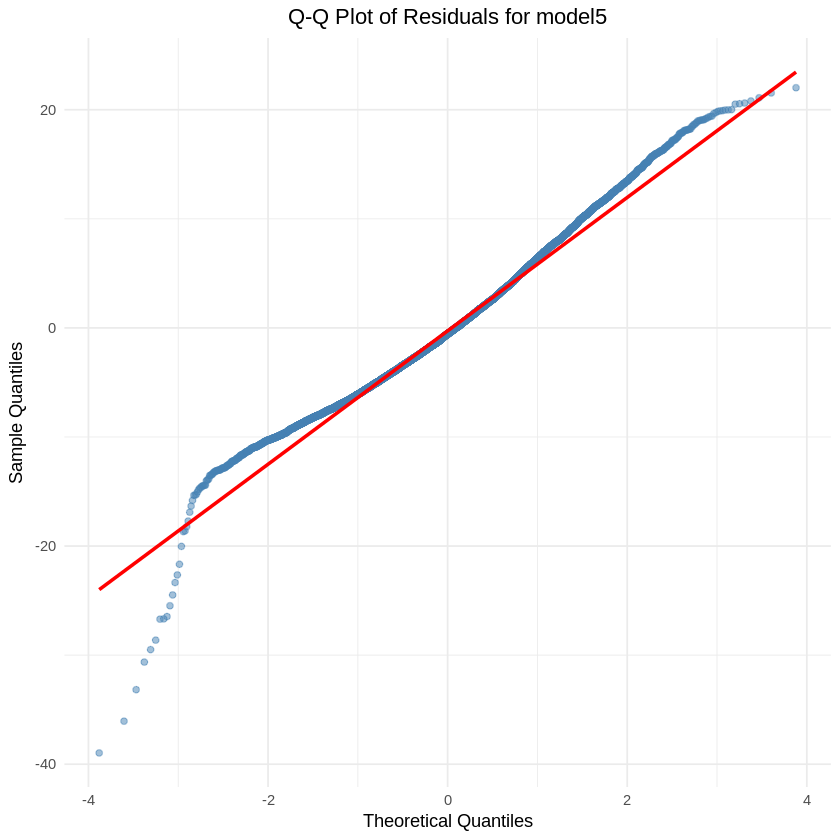

In [72]:
# --- 2.5 Checking the Distribution of Model Prediction Errors (Residuals) ---

# We use Q-Q plots to assess whether the residuals follow a normal distribution.

# Function to generate a Q-Q plot for residuals
plot_qq_residuals_func <- function(y_true, y_pred, model_name_str) {
  residuals_vec <- y_true - y_pred # Compute residuals
  p <- ggplot(data.frame(residuals = residuals_vec), aes(sample = residuals)) +
    stat_qq(color = "steelblue", size = 1.5, alpha = 0.5) +       # Plot sample quantiles
    stat_qq_line(color = "red", linewidth = 1) +                  # Add reference line for normality
    labs(title = paste("Q-Q Plot of Residuals for", model_name_str),
         x = "Theoretical Quantiles", y = "Sample Quantiles") +
    theme(plot.title = element_text(hjust = 0.5)) # Center the plot title
  print(p) # Display the plot
}

# Generate predicted values for each model
predictions_list_all_models <- lapply(names(model_definitions), function(model_name) {
  theta_vec <- theta_list_all_models[[model_name]]             # Get the estimated parameters
  X_processed_mat <- X_final_processed_list_all_models[[model_name]] # Get the corresponding design matrix

  # Skip if parameters or design matrix contain NA, or dimensions don't match
  if (any(is.na(theta_vec)) || any(is.na(X_processed_mat)) || ncol(X_processed_mat) != length(theta_vec)) {
    return(rep(NA, length(y_response))) # Return a vector of NAs as fallback
  }

  # Compute predicted values using the model: Xθ̂
  tryCatch(X_processed_mat %*% theta_vec, error = function(e) rep(NA, length(y_response)))
})
names(predictions_list_all_models) <- names(model_definitions) # Label predictions by model

# Generate and display Q-Q plots of residuals for all models
for (model_name in names(model_definitions)) {
  preds <- predictions_list_all_models[[model_name]]
  if (!all(is.na(preds))) { # Proceed if predictions are valid
    plot_qq_residuals_func(y_response, preds, model_name)
  } else {
    cat("Cannot generate Q-Q plot for", model_name, "due to missing predictions or parameters.\n")
  }
}


In [73]:
# --- 2.6 Select 'Best' Regression Model (Dynamic Version) ---

# Ensure required input from Section 2.4 is available
if (!exists("aic_bic_list_all_models")) {
  stop("Error: 'aic_bic_list_all_models' not found. Please run Section 2.4 first.")
}

# Extract model names, AIC, and BIC values
model_names_dynamic <- names(aic_bic_list_all_models)
AIC_values_dynamic <- sapply(aic_bic_list_all_models, function(model) model$AIC)
BIC_values_dynamic <- sapply(aic_bic_list_all_models, function(model) model$BIC)

# Match model names to AIC and BIC vectors (if not already)
if (!is.null(names(AIC_values_dynamic))) {
  model_names_dynamic <- names(AIC_values_dynamic)
}

# Identify model with the lowest AIC
if (all(is.na(AIC_values_dynamic))) {
  best_model_AIC_dynamic <- NA
  warning("All AIC values are NA. Cannot determine best model by AIC.")
} else {
  best_model_AIC_dynamic <- model_names_dynamic[which.min(AIC_values_dynamic)]
}

# Identify model with the lowest BIC
if (all(is.na(BIC_values_dynamic))) {
  best_model_BIC_dynamic <- NA
  warning("All BIC values are NA. Cannot determine best model by BIC.")
} else {
  best_model_BIC_dynamic <- model_names_dynamic[which.min(BIC_values_dynamic)]
}

# Final model selection logic
if (!is.na(best_model_AIC_dynamic) && !is.na(best_model_BIC_dynamic) &&
    best_model_AIC_dynamic == best_model_BIC_dynamic) {
  best_model_name <- best_model_AIC_dynamic
} else if (!is.na(best_model_AIC_dynamic)) {
  best_model_name <- best_model_AIC_dynamic
  if (!is.na(best_model_BIC_dynamic) && best_model_AIC_dynamic != best_model_BIC_dynamic) {
    cat("Note: AIC and BIC select different models. AIC:", best_model_AIC_dynamic,
        "| BIC:", best_model_BIC_dynamic, "\nProceeding with AIC-based choice.\n")
  }
} else if (!is.na(best_model_BIC_dynamic)) {
  best_model_name <- best_model_BIC_dynamic
  cat("Note: AIC values are NA. Using BIC to select model:", best_model_BIC_dynamic, "\n")
} else {
  best_model_name <- NA
  warning("Model selection failed. Both AIC and BIC returned NA.")
}

# Summary of model selection
if (!is.na(best_model_name)) {
  cat("Selected model based on AIC/BIC criteria:", best_model_name, "\n")
} else {
  cat("No valid model could be selected. Consider defining a fallback model.\n")
  # Optional fallback strategy:
  # best_model_name <- "model5"
  # cat("Fallback: Defaulting to model5 to continue script execution.\n")
}

# --- Model Selection Justification ---
cat("\n--- Model Selection Justification ---\n")
cat("Based on information criteria and model diagnostics:\n")
cat(paste("* Lowest AIC:", best_model_AIC_dynamic, "(AIC =", round(min(AIC_values_dynamic, na.rm = TRUE), 2), ")\n"))
cat(paste("* Lowest BIC:", best_model_BIC_dynamic, "(BIC =", round(min(BIC_values_dynamic, na.rm = TRUE), 2), ")\n"))

if (!is.na(best_model_name)) {
  cat(paste("* Final selected model:", best_model_name, "\n"))
} else {
  cat("* Unable to select a model due to insufficient AIC/BIC data.\n")
}
cat("--- End of Justification ---\n")


Selected model based on AIC/BIC criteria: model5 

--- Model Selection Justification ---
Based on information criteria and model diagnostics:
* Lowest AIC: model5 (AIC = 62018.79 )
* Lowest BIC: model5 (BIC = 62047.46 )
* Final selected model: model5 
--- End of Justification ---


First few rows of test predictions with CI:
  index actual predicted lower_ci upper_ci
1     1 470.96  469.7262 457.5569 481.8954
2     2 484.31  475.8909 463.7210 488.0607
3     3 451.41  454.6513 442.4806 466.8221
4     4 426.25  432.1146 419.9444 444.2847
5     5 480.66  473.2497 461.0777 485.4216
6     6 448.56  452.6777 440.5009 464.8546

Evaluation Metrics for model5 on Test Set:
RMSE: 6.1288
MAE: 4.9256
R²: 0.8709


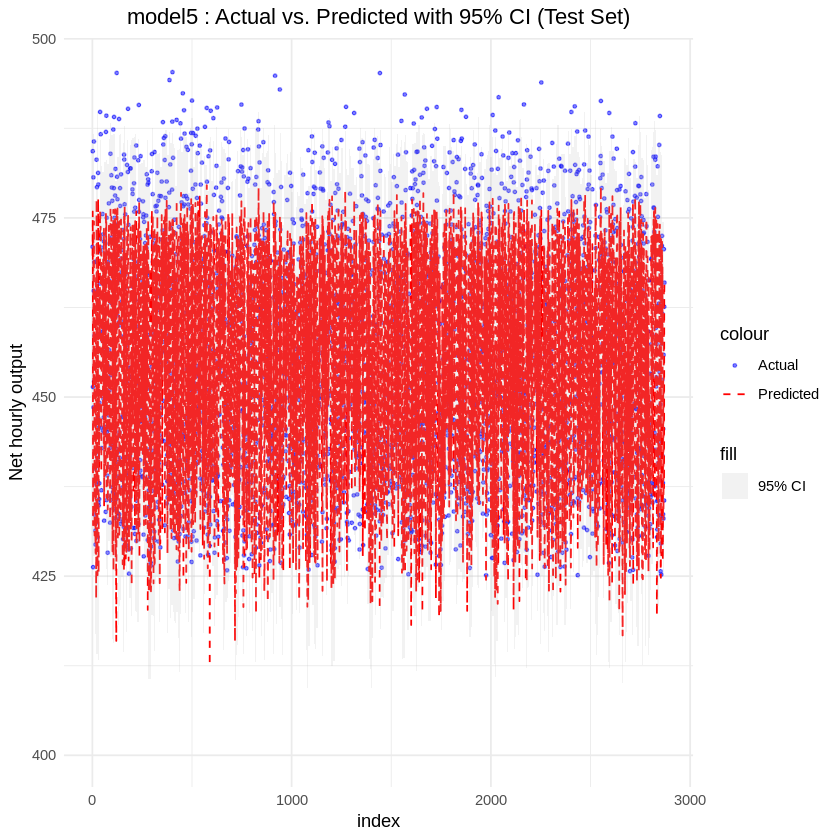


	Shapiro-Wilk normality test

data:  residuals_test_best
W = 0.98871, p-value = 2.556e-14



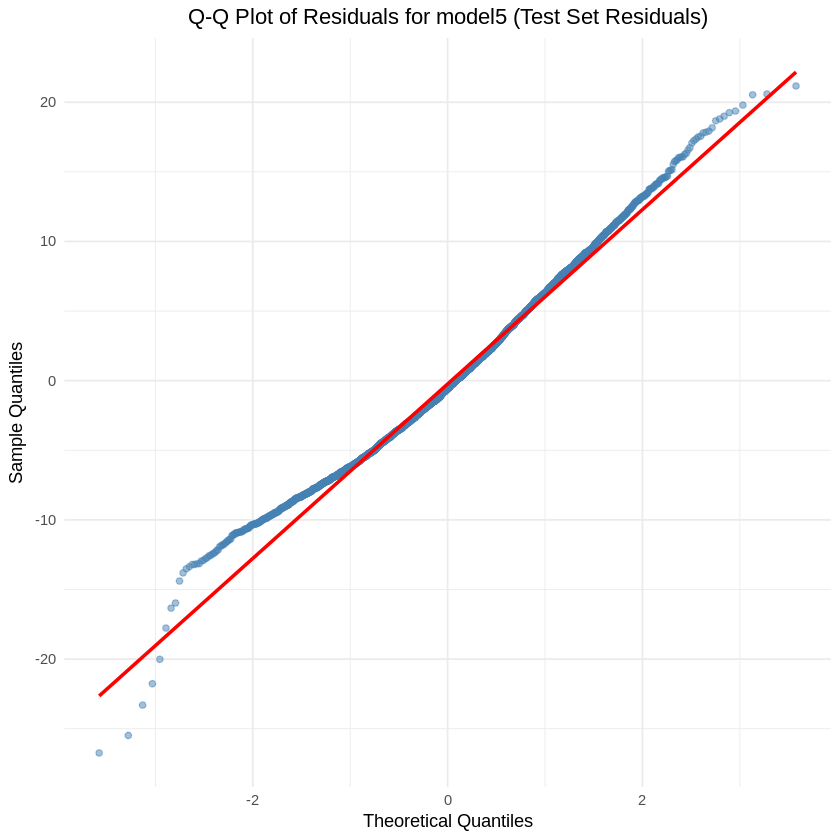

In [74]:
# --- 2.7 Train-Test Split and Evaluation of the Best Model ---

# Divide the data into training (70%) and testing (30%) sets, train the selected best model (Model 5)
# on the training portion, then assess its predictive accuracy on the test data,
# including calculation of 95% confidence intervals around the predictions.

# Extract the raw predictor variables for the chosen best model
X_best_model_raw <- model_definitions[[best_model_name]]
y_best_model_response <- y_response # Complete response vector

# Fix random seed to ensure reproducibility of data partitioning
set.seed(42)
n_total_best <- length(y_best_model_response) # Total number of observations available
train_size_best <- floor(0.70 * n_total_best) # Number of samples allocated for training (70%)
# Randomly select indices to form the training subset
train_indices_best <- sample(1:n_total_best, train_size_best, replace = FALSE)

# Create training and testing datasets based on selected indices
X_train_best_raw <- X_best_model_raw[train_indices_best, , drop = FALSE] # Raw training predictors
X_test_best_raw <- X_best_model_raw[-train_indices_best, , drop = FALSE] # Raw testing predictors
y_train_best <- y_best_model_response[train_indices_best]               # Training target values
y_test_best <- y_best_model_response[-train_indices_best]               # Testing target values

# Compute mean and standard deviation values from the training data alone for normalization
train_means_best <- colMeans(X_train_best_raw, na.rm=TRUE)
train_sds_best <- apply(X_train_best_raw, 2, sd, na.rm=TRUE)
# Replace any zero or missing standard deviations with 1 to avoid division errors during scaling
train_sds_best[train_sds_best == 0 | is.na(train_sds_best)] <- 1

# Normalize both training and test sets using training set statistics
X_train_best_scaled <- scale(X_train_best_raw, center = train_means_best, scale = train_sds_best)
X_test_best_scaled <- scale(X_test_best_raw, center = train_means_best, scale = train_sds_best)

# Convert scaled matrices into data frame format
X_train_best_scaled_df <- as.data.frame(X_train_best_scaled)
X_test_best_scaled_df <- as.data.frame(X_test_best_scaled)

# Estimate the regression coefficients (theta_hat) for the best model using scaled training data
theta_hat_best_model_train <- estimate_theta_ols_scaled(as.matrix(X_train_best_scaled_df), y_train_best, lambda_val = lambda_ols_param)

# Add intercept term to test predictors for generating predictions
X_test_best_bias <- cbind("(Intercept)" = 1, X_test_best_scaled_df)
# Generate predicted values on scaled test dataset
y_pred_test_best <- as.matrix(X_test_best_bias) %*% theta_hat_best_model_train

# --- Compute Confidence Intervals for Test Set Predictions ---
# Add intercept term to training predictors for variance estimation
X_train_best_bias_for_sigma <- cbind("(Intercept)" = 1, X_train_best_scaled_df)
y_pred_train_best_for_sigma <- as.matrix(X_train_best_bias_for_sigma) %*% theta_hat_best_model_train
residuals_train_best_for_sigma <- y_train_best - y_pred_train_best_for_sigma
# Calculate estimate of error variance (σ̂²) using training residuals
# Degrees of freedom: number of training samples minus number of parameters (including intercept)
sigma_squared_best_model_est_train <- sum(residuals_train_best_for_sigma^2) / (nrow(X_train_best_bias_for_sigma) - ncol(X_train_best_bias_for_sigma))

# Calculate covariance matrix of estimated coefficients: σ̂² * (XᵀX)⁻¹
cov_theta_best_model_train <- sigma_squared_best_model_est_train * MASS::ginv(t(as.matrix(X_train_best_bias_for_sigma)) %*% as.matrix(X_train_best_bias_for_sigma))
# Compute standard errors of predictions on test set, accounting for both coefficient uncertainty and residual variance
se_pred_best_model <- sqrt(diag(as.matrix(X_test_best_bias) %*% cov_theta_best_model_train %*% t(as.matrix(X_test_best_bias))) + sigma_squared_best_model_est_train)
# Determine critical t-value for constructing 95% confidence intervals
t_value_best_model_ci <- qt(1 - 0.05 / 2, df = nrow(X_train_best_bias_for_sigma) - ncol(X_train_best_bias_for_sigma))

# Calculate the lower and upper limits of the 95% confidence intervals for predictions
lower_bound_best_model <- y_pred_test_best - t_value_best_model_ci * se_pred_best_model
upper_bound_best_model <- y_pred_test_best + t_value_best_model_ci * se_pred_best_model

# Assemble a data frame to summarize actual values, predictions, and confidence intervals
results_best_model_df <- data.frame(
  index = 1:length(y_test_best),          # Sequential index for plotting purposes
  actual = y_test_best,                   # Observed values from the test set
  predicted = as.vector(y_pred_test_best), # Predicted values on the test set
  lower_ci = as.vector(lower_bound_best_model), # Lower bounds of 95% CI
  upper_ci = as.vector(upper_bound_best_model)  # Upper bounds of 95% CI
)
cat("First few rows of test predictions with CI:\n")
print(head(results_best_model_df))

# Visualize actual vs predicted values including 95% confidence intervals on the test data
p_actual_vs_pred_ci <- ggplot(results_best_model_df, aes(x = index)) +
  geom_point(aes(y = actual, color = "Actual"), alpha = 0.5, size=0.7) + # Plot actual data points
  geom_line(aes(y = predicted, color = "Predicted"), linetype = "dashed") + # Plot predicted line
  geom_ribbon(aes(ymin = lower_ci, ymax = upper_ci, fill = "95% CI"), alpha = 0.2) + # Shade 95% confidence band
  labs(title = paste(best_model_name, ": Actual vs. Predicted with 95% CI (Test Set)"), y = "Net hourly output") +
  scale_color_manual(values = c("Actual" = "blue", "Predicted" = "red")) +
  scale_fill_manual(values = c("95% CI" = "gray")) +
  theme(plot.title = element_text(hjust = 0.5))
print(p_actual_vs_pred_ci)

# --- Assess Model Accuracy on the Test Data ---
residuals_test_best <- y_test_best - y_pred_test_best # Residual errors on test set
rmse_best <- sqrt(mean(residuals_test_best^2))        # Calculate Root Mean Squared Error
mae_best <- mean(abs(residuals_test_best))           # Calculate Mean Absolute Error
# Calculate R-squared value as proportion of variance explained on test set
r_squared_best <- 1 - (sum(residuals_test_best^2) / sum((y_test_best - mean(y_test_best))^2))

cat(paste("\nEvaluation Metrics for", best_model_name, "on Test Set:\n"))
cat(sprintf("RMSE: %.4f\nMAE: %.4f\nR²: %.4f\n", rmse_best, mae_best, r_squared_best))

# Generate Q-Q plot to assess normality of residuals on test data
plot_qq_residuals_func(y_test_best, as.vector(y_pred_test_best), paste(best_model_name, "(Test Set Residuals)"))

# Conduct Shapiro-Wilk normality test on residuals if sample size permits
# For sample sizes > 5000, test on a random subset of 5000 residuals
if (length(residuals_test_best) >=3 && length(residuals_test_best) <= 5000 ) {
    print(shapiro.test(residuals_test_best))
} else if (length(residuals_test_best) > 5000) {
    cat("Performing Shapiro-Wilk test on a sample of 5000 residuals due to large dataset.\n")
    print(shapiro.test(sample(residuals_test_best, 5000)))
}

# Save the estimated regression coefficients and error variance from training for later use (Task 3 - ABC)
ols_coefs_for_abc <- as.vector(theta_hat_best_model_train)
names(ols_coefs_for_abc) <- rownames(theta_hat_best_model_train) # Assign coefficient names
ols_sigma_sq_for_abc <- sigma_squared_best_model_est_train # Store training error variance estimate


# --- Task 3: Approximate Bayesian Computation (ABC)  ---

In [75]:
# --- Task 3: Approximate Bayesian Computation (ABC) ---

cat("\n========================================\n")
cat("Task 3: Approximate Bayesian Computation (ABC)\n")
cat("========================================\n")

# 3.1 Determine which two parameters have the largest absolute OLS coefficient estimates
# from the model trained in Task 2.7 (model5 on training data).
# The remaining parameters will remain fixed at their OLS estimates.

cat("OLS coefficients for the selected model (model5) based on scaled training data:\n")
# ols_coefs_for_abc and ols_sigma_sq_for_abc should already be defined from Task 2.7
print(ols_coefs_for_abc)

# Remove the intercept and identify the two slope coefficients with the greatest absolute magnitude
slope_coefs <- ols_coefs_for_abc[names(ols_coefs_for_abc) != "(Intercept)"]
sorted_abs_slope_coefs <- sort(abs(slope_coefs), decreasing = TRUE) # Sort descending by absolute value

# Confirm there are at least two slope coefficients available
if (length(sorted_abs_slope_coefs) < 2) {
  stop("The selected model has fewer than two slope coefficients. ABC requires exactly two to proceed.")
}
# Extract the names of the top two parameters by absolute size
params_for_abc_names <- names(sorted_abs_slope_coefs)[1:2]

cat("\nParameters chosen for ABC (those with the largest absolute OLS values):\n")
print(params_for_abc_names)

# Retrieve the OLS coefficient estimates for the selected two parameters
param1_ols_est <- ols_coefs_for_abc[params_for_abc_names[1]]
param2_ols_est <- ols_coefs_for_abc[params_for_abc_names[2]]

cat(paste("\nOLS estimate for", params_for_abc_names[1], ":", param1_ols_est, "\n"))
cat(paste("OLS estimate for", params_for_abc_names[2], ":", param2_ols_est, "\n"))

# Collect the OLS estimates of parameters that will remain fixed during ABC
fixed_params_ols_est <- ols_coefs_for_abc[!names(ols_coefs_for_abc) %in% params_for_abc_names]
cat("\nParameters to be fixed (using their OLS estimates from training data):\n")
print(fixed_params_ols_est)

# Access the full design matrix from the scaled training set including the intercept term
# X_train_best_bias_for_sigma was created in Task 2.7
X_train_full_design_df <- X_train_best_bias_for_sigma
X_train_full_design_matrix <- as.matrix(X_train_full_design_df)



Task 3: Approximate Bayesian Computation (ABC)
OLS coefficients for the selected model (model5) based on scaled training data:
(Intercept)          x4       x1_sq       x3_sq 
 454.402246    1.411504  -10.642313   -5.098567 

Parameters chosen for ABC (those with the largest absolute OLS values):
[1] "x1_sq" "x3_sq"

OLS estimate for x1_sq : -10.6423129471256 
OLS estimate for x3_sq : -5.09856671428894 

Parameters to be fixed (using their OLS estimates from training data):
(Intercept)          x4 
 454.402246    1.411504 


In [76]:
# 3.2 Set up uniform prior distributions for the two parameters chosen for ABC.
# The prior intervals are centered on the respective OLS estimates.
define_prior_range <- function(ols_est, scale_factor = 1.0) {
  abs_est <- abs(ols_est)
  # Use a default prior width if the OLS estimate is very close to zero,
  # to prevent defining an excessively narrow prior.
  if (abs_est < 1e-4) { # Check for near-zero estimates
    range_val <- 0.5  # Default prior range in this case
  } else {
    range_val <- scale_factor * abs_est  # Prior range proportional to OLS magnitude
  }
  return(c(ols_est - range_val, ols_est + range_val))  # Define interval as center ± range
}

# Calculate prior ranges for the two parameters selected for ABC
prior_range_param1 <- define_prior_range(param1_ols_est, scale_factor = 1.0)  # Scale factor adjustable
prior_range_param2 <- define_prior_range(param2_ols_est, scale_factor = 1.0)

cat(paste("\nPrior interval for", params_for_abc_names[1], ": [", prior_range_param1[1], ",", prior_range_param1[2], "]\n"))
cat(paste("Prior interval for", params_for_abc_names[2], ": [", prior_range_param2[1], ",", prior_range_param2[2], "]\n"))



Prior interval for x1_sq : [ -21.2846258942513 , 0 ]
Prior interval for x3_sq : [ -10.1971334285779 , 0 ]


In [77]:
# 3.3 Conduct rejection ABC sampling.
# - Draw parameter samples from uniform priors for the two selected parameters.
# - Keep remaining parameters fixed at their OLS estimates.
# - Compute RSS for each simulated parameter set.
# - Accept samples where the simulated RSS is below the predefined tolerance (epsilon).

n_abc_simulations <- 50000  # Total number of ABC simulations to perform
accepted_samples_list <- list()  # Store accepted samples efficiently as a list of data frames

# Function to compute residual sum of squares (RSS)
calculate_rss <- function(y_true, y_pred) {
  sum((y_true - y_pred)^2)
}

# Calculate observed RSS from the OLS model on the training data,
# which will serve as a reference for setting the tolerance.
# Ensure the OLS coefficients align with the columns of the design matrix.
ols_coefs_ordered_for_rss <- ols_coefs_for_abc[colnames(X_train_full_design_matrix)]
y_pred_train_ols <- X_train_full_design_matrix %*% ols_coefs_ordered_for_rss  # Predicted values from OLS
observed_rss_train <- calculate_rss(y_train_best, y_pred_train_ols)  # Observed RSS on training data
cat(paste("\nObserved RSS from OLS on training data:", observed_rss_train, "\n"))

# Define the acceptance threshold epsilon as 105% of the observed RSS
epsilon <- observed_rss_train * 1.05
cat(paste("ABC tolerance epsilon (maximum RSS for acceptance):", epsilon, "\n"))

# Extract all parameter names (intercept and slopes) in proper order
all_param_names <- names(ols_coefs_for_abc)

# Initialize a progress bar to monitor simulation progress
pb <- txtProgressBar(min = 0, max = n_abc_simulations, style = 3)

# Main ABC rejection sampling loop
for (i in 1:n_abc_simulations) {
  # Sample the two parameters independently from their uniform priors
  sampled_param1 <- runif(1, min = prior_range_param1[1], max = prior_range_param1[2])
  sampled_param2 <- runif(1, min = prior_range_param2[1], max = prior_range_param2[2])

  # Construct a full parameter vector initialized to zero
  current_theta_abc <- numeric(length(all_param_names))
  names(current_theta_abc) <- all_param_names

  # Insert the sampled values for the two parameters under ABC consideration
  current_theta_abc[params_for_abc_names[1]] <- sampled_param1
  current_theta_abc[params_for_abc_names[2]] <- sampled_param2

  # Fill in the remaining parameters with their fixed OLS estimates
  for (p_name in names(fixed_params_ols_est)) {
    current_theta_abc[p_name] <- fixed_params_ols_est[p_name]
  }

  # Reorder parameter vector to match the design matrix columns exactly
  current_theta_abc_ordered <- current_theta_abc[colnames(X_train_full_design_matrix)]

  # Generate predicted responses based on the simulated parameter vector
  y_pred_abc <- X_train_full_design_matrix %*% current_theta_abc_ordered
  # Compute RSS for the current simulated parameters
  rss_simulated <- calculate_rss(y_train_best, y_pred_abc)

  # Accept the sample if the RSS falls below the tolerance threshold
  if (rss_simulated < epsilon) {
    # Save the accepted sample’s parameter values and RSS
    temp_data_list <- list()
    temp_data_list[[params_for_abc_names[1]]] <- sampled_param1
    temp_data_list[[params_for_abc_names[2]]] <- sampled_param2
    temp_data_list[["rss"]] <- rss_simulated
    accepted_samples_list[[length(accepted_samples_list) + 1]] <- as.data.frame(temp_data_list)
  }
  setTxtProgressBar(pb, i)  # Update the progress bar
}
close(pb)  # Finalize the progress bar

# Combine all accepted samples into a single data frame for further analysis
accepted_samples <- do.call(rbind, accepted_samples_list)

# Check whether any samples were accepted and handle accordingly
if (is.null(accepted_samples) || nrow(accepted_samples) == 0) {
    cat("\nNo samples were accepted. Consider increasing n_abc_simulations, broadening priors, or raising epsilon.\n")
    # Create an empty data frame with expected columns to avoid downstream errors
    accepted_samples <- data.frame(matrix(ncol = 3, nrow = 0))
    colnames(accepted_samples) <- c(params_for_abc_names, "rss")
} else {
    cat(paste("\nNumber of accepted samples:", nrow(accepted_samples), "out of", n_abc_simulations, "\n"))
    cat(paste("Acceptance rate:", nrow(accepted_samples) / n_abc_simulations * 100, "%\n"))
}



Observed RSS from OLS on training data: 257841.131843422 
ABC tolerance epsilon (maximum RSS for acceptance): 270733.188435593 
  |======================================================================| 100%

Number of accepted samples: 2523 out of 50000 
Acceptance rate: 5.046 %


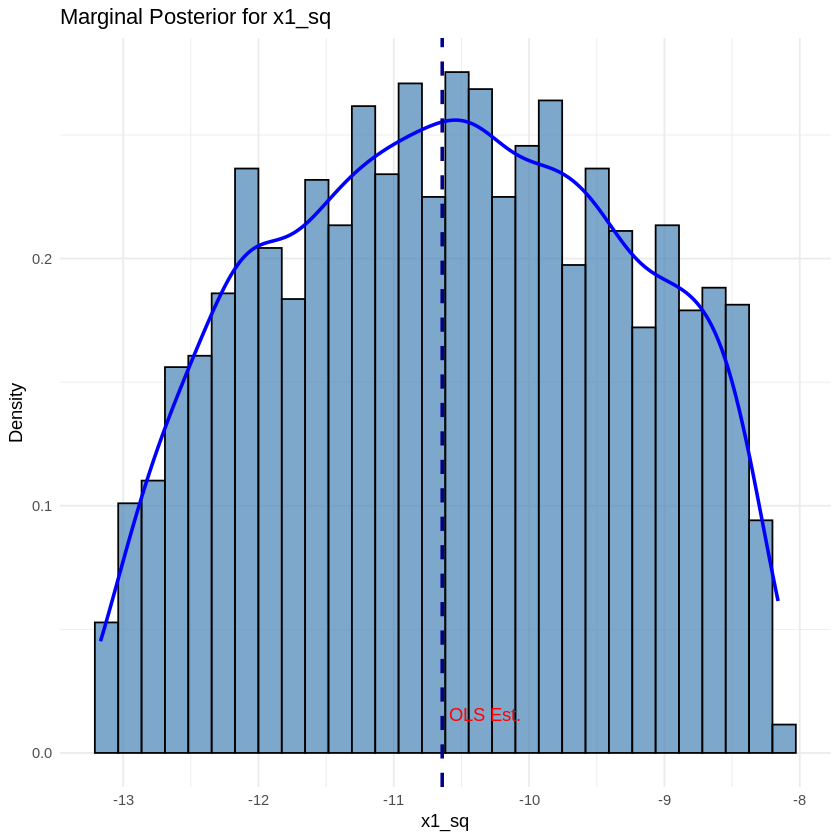

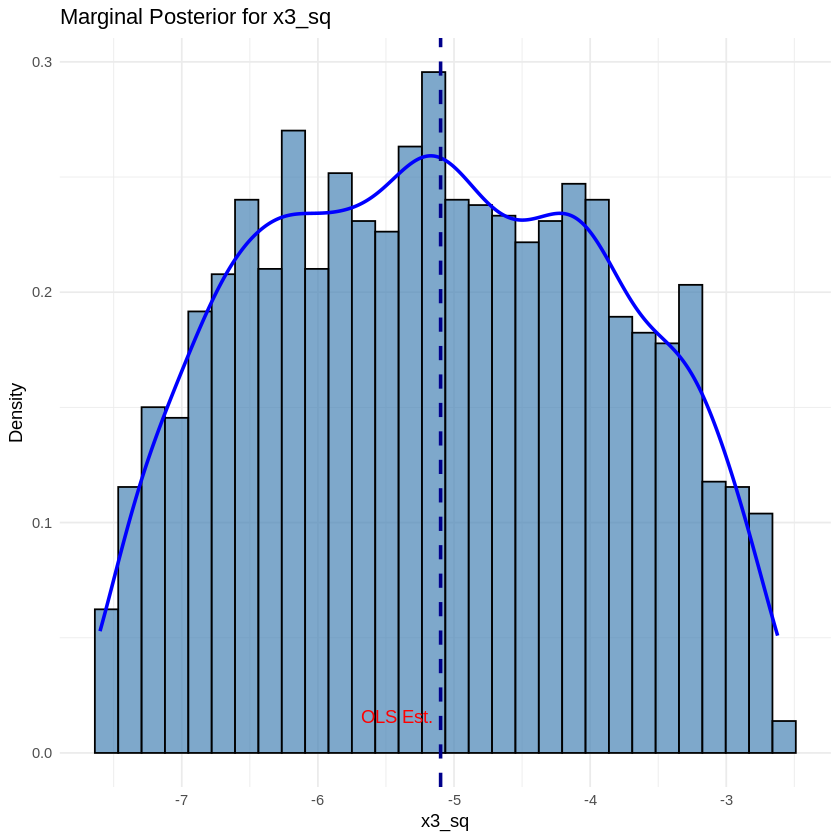

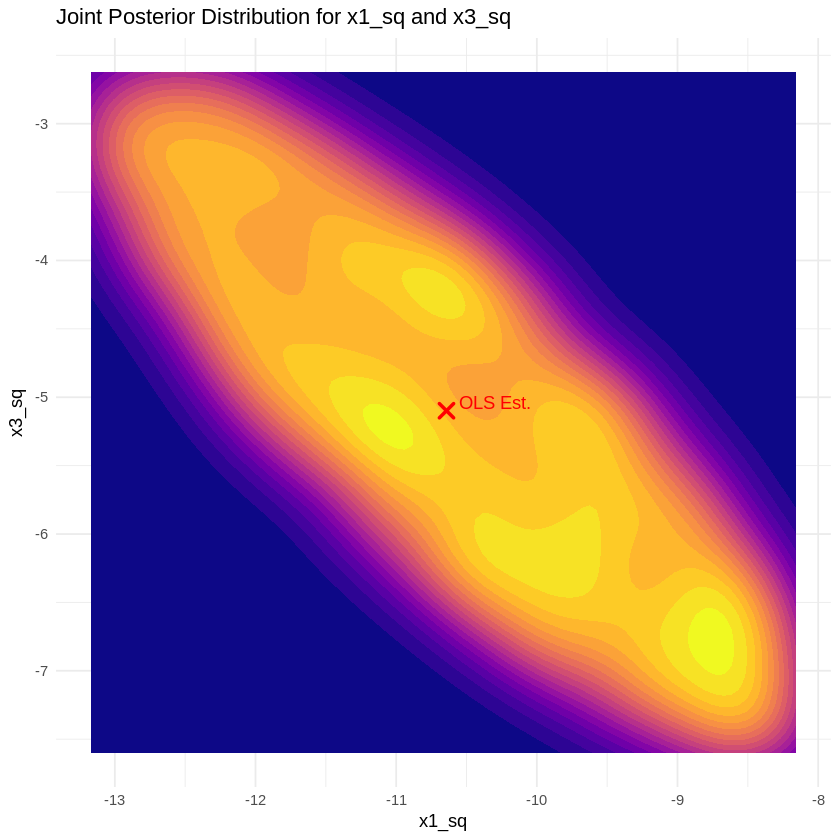


--- End of Task 3 ---


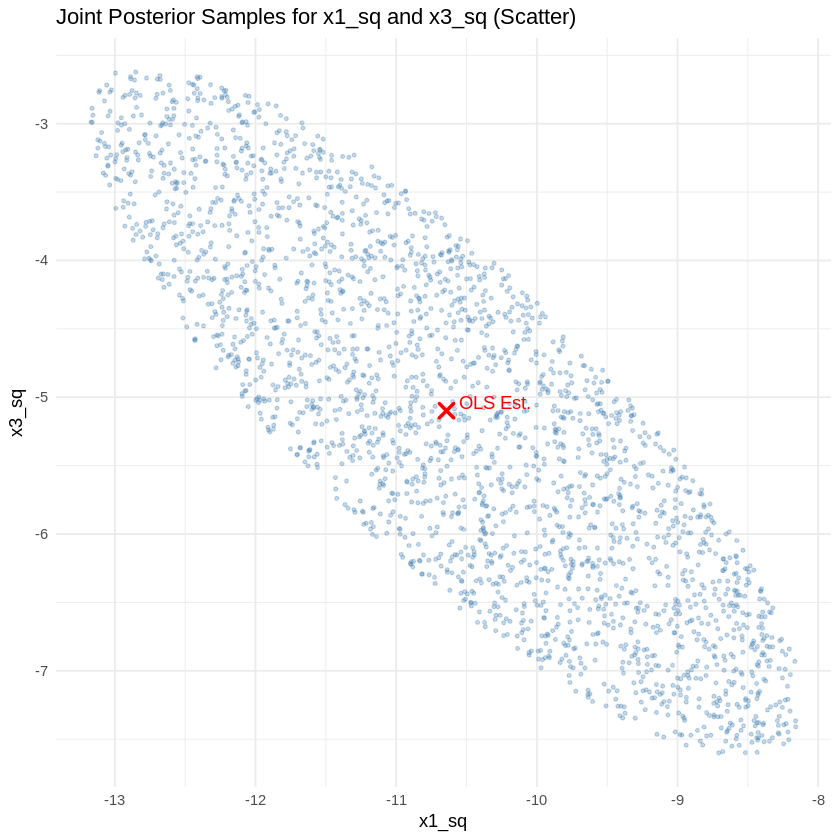

In [84]:
# 3.4 Visualize the joint and marginal posterior distributions of the two selected parameters.
if (is.null(accepted_samples) || nrow(accepted_samples) < 2) {
  # At least two samples are needed to produce density plots
  warning("Too few samples accepted for plotting. Consider increasing n_abc_simulations, broadening priors, or relaxing epsilon.")
} else {
  param1_label <- params_for_abc_names[1]  # First ABC parameter
  param2_label <- params_for_abc_names[2]  # Second ABC parameter

  # Ensure the relevant columns are numeric (important if accepted_samples was initialized empty)
  accepted_samples[[param1_label]] <- as.numeric(accepted_samples[[param1_label]])
  accepted_samples[[param2_label]] <- as.numeric(accepted_samples[[param2_label]])

  # --- Marginal Posterior for Parameter 1 ---
  p_marginal1 <- ggplot(accepted_samples, aes(x = .data[[param1_label]])) +
    geom_histogram(aes(y = after_stat(density)), bins = 30, fill = "steelblue", color = "black", alpha = 0.7) +
    geom_density(color = "blue", linewidth = 1) +
    geom_vline(xintercept = param1_ols_est, color = "darkblue", linetype = "dashed", linewidth = 1) +
    labs(title = paste("Marginal Posterior for", param1_label),
         x = param1_label, y = "Density") +
    annotate("text", x = param1_ols_est, y = max(density(accepted_samples[[param1_label]])$y) * 0.05,
             label = "OLS Est.", vjust = 0,
             hjust = ifelse(param1_ols_est > median(accepted_samples[[param1_label]]), 1.1, -0.1), color = "red") +
    theme_minimal()
  print(p_marginal1)

  # --- Marginal Posterior for Parameter 2 ---
  p_marginal2 <- ggplot(accepted_samples, aes(x = .data[[param2_label]])) +
    geom_histogram(aes(y = after_stat(density)), bins = 30, fill = "steelblue", color = "black", alpha = 0.7) +
    geom_density(color = "blue", linewidth = 1) +
    geom_vline(xintercept = param2_ols_est, color = "darkblue", linetype = "dashed", linewidth = 1) +
    labs(title = paste("Marginal Posterior for", param2_label),
         x = param2_label, y = "Density") +
    annotate("text", x = param2_ols_est, y = max(density(accepted_samples[[param2_label]])$y) * 0.05,
             label = "OLS Est.", vjust = 0,
             hjust = ifelse(param2_ols_est > median(accepted_samples[[param2_label]]), 1.1, -0.1), color = "red") +
    theme_minimal()
  print(p_marginal2)

  # --- Joint Posterior Distribution (2D Density Plot) ---
  p_joint <- ggplot(accepted_samples, aes(x = .data[[param1_label]], y = .data[[param2_label]])) +
    stat_density_2d_filled(aes(fill = after_stat(level)), geom = "polygon", contour_var = "density", bins = 20) +
    scale_fill_viridis_d(option = "plasma") +
    geom_point(data = data.frame(x = param1_ols_est, y = param2_ols_est), aes(x = x, y = y),
               color = "red", size = 3, shape = 4, stroke = 1.5) +  # Mark OLS estimate with a red cross
    annotate("text", x = param1_ols_est, y = param2_ols_est, label = " OLS Est.",
             color = "red", hjust = -0.1, vjust = -0.1) +
    labs(title = paste("Joint Posterior Distribution for", param1_label, "and", param2_label),
         x = param1_label, y = param2_label) +
    theme_minimal() +
    guides(fill = "none")  # Hide legend for fill
  print(p_joint)

  # --- Joint Posterior Distribution (Scatter Plot of Accepted Samples) ---
  p_joint_scatter <- ggplot(accepted_samples, aes(x = .data[[param1_label]], y = .data[[param2_label]])) +
    geom_point(alpha = 0.3, color = "steelblue", size = 0.8) +  # Scatter plot of accepted draws
    geom_point(data = data.frame(x = param1_ols_est, y = param2_ols_est), aes(x = x, y = y),
               color = "red", size = 3, shape = 4, stroke = 1.5) +  # Mark OLS estimate
    annotate("text", x = param1_ols_est, y = param2_ols_est, label = " OLS Est.",
             color = "red", hjust = -0.1, vjust = -0.1) +
    labs(title = paste("Joint Posterior Samples for", param1_label, "and", param2_label, "(Scatter)"),
         x = param1_label, y = param2_label) +
    theme_minimal()
  print(p_joint_scatter)
}
cat("\n--- End of Task 3 ---\n")
